# Data Preprocessing

In [ ]:
# Mount your Google Drive so Colab can access your files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For data manipulation
import pandas as pd
import numpy as np

In [ ]:
# Load your dataset from Google Drive
file_path = '/content/drive/MyDrive/INFO648/Data/cleaned_songs_utf_final.csv'
df = pd.read_csv(file_path)


In [ ]:
# Show first 5 rows
print("Preview of Dataset:")
df.head()


Preview of Dataset:


song_name_len  duration_ms  explicit    year  popularity  hot  \
0           22.0     211160.0         0  2000.0        77.0  1.0   
1           20.0     167066.0         0  1999.0        79.0  1.0   
2            7.0     250546.0         0  1999.0        66.0  0.0   
3           12.0     224493.0         0  2000.0        78.0  1.0   
4           11.0     200560.0         0  2000.0        65.0  0.0   

   danceability  energy  key  loudness  ...  valence    tempo  pop  rock  \
0         0.751   0.834  1.0    -5.444  ...    0.894   95.053  1.0   0.0   
1         0.434   0.897  0.0    -4.918  ...    0.684  148.726  1.0   1.0   
2         0.529   0.496  7.0    -9.007  ...    0.278  136.859  1.0   0.0   
3         0.551   0.913  0.0    -4.063  ...    0.544  119.992  0.0   1.0   
4         0.614   0.928  8.0    -4.806  ...    0.879  172.656  1.0   0.0   

   hiphop  dance  folk  rnb  latin  target  
0     0.0    0.0   0.0  0.0    0.0       1  
1     0.0    0.0   0.0  0.0    0.0       1  
2     0.0    0.0   0.0  0.0    0.0       1  
3     0.0    0.0   0.0  0.0    0.0       1  
4     0.0    0.0   0.0  0.0    0.0       1  

[5 rows x 25 columns]

In [ ]:
# Show data structure and types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name_len     1500 non-null   float64
 1   duration_ms       1500 non-null   float64
 2   explicit          1500 non-null   int64  
 3   year              1500 non-null   float64
 4   popularity        1500 non-null   float64
 5   hot               1500 non-null   float64
 6   danceability      1500 non-null   float64
 7   energy            1500 non-null   float64
 8   key               1500 non-null   float64
 9   loudness          1500 non-null   float64
 10  mode              1500 non-null   float64
 11  speechiness       1500 non-null   float64
 12  acousticness      1500 non-null   float64
 13  instrumentalness  1500 non-null   float64
 14  liveness          1500 non-null   float64
 15  valence           1500 non-null   float64
 16  tempo             1500 non-

In [ ]:
# Check how many missing values are in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
target              0
dtype: int64


In [ ]:
# Show new size of data
print(f"\nDataset shape after removing missing values: {df.shape}")



Dataset shape after removing missing values: (1500, 25)


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
       song_name_len    duration_ms     explicit         year   popularity  \
count    1500.000000    1500.000000  1500.000000  1500.000000  1500.000000   
mean       17.552667  234667.923333     0.244000  2007.034000    59.414000   
std        11.541289   38723.131986     0.429636     4.567722    19.346045   
min         2.000000  127920.000000     0.000000  1998.000000     0.000000   
25%         9.000000  209116.500000     0.000000  2003.000000    56.000000   
50%        14.000000  228973.000000     0.000000  2007.000000    64.000000   
75%        23.000000  254086.000000     0.000000  2011.000000    71.000000   
max        75.000000  484146.000000     1.000000  2020.000000    89.000000   

               hot  danceability       energy          key     loudness  ...  \
count  1500.000000   1500.000000  1500.000000  1500.000000  1500.000000  ...   
mean      0.128000      0.659393     0.737019     5.365333    -5.434571  ...   
std       0.334201      0.142157

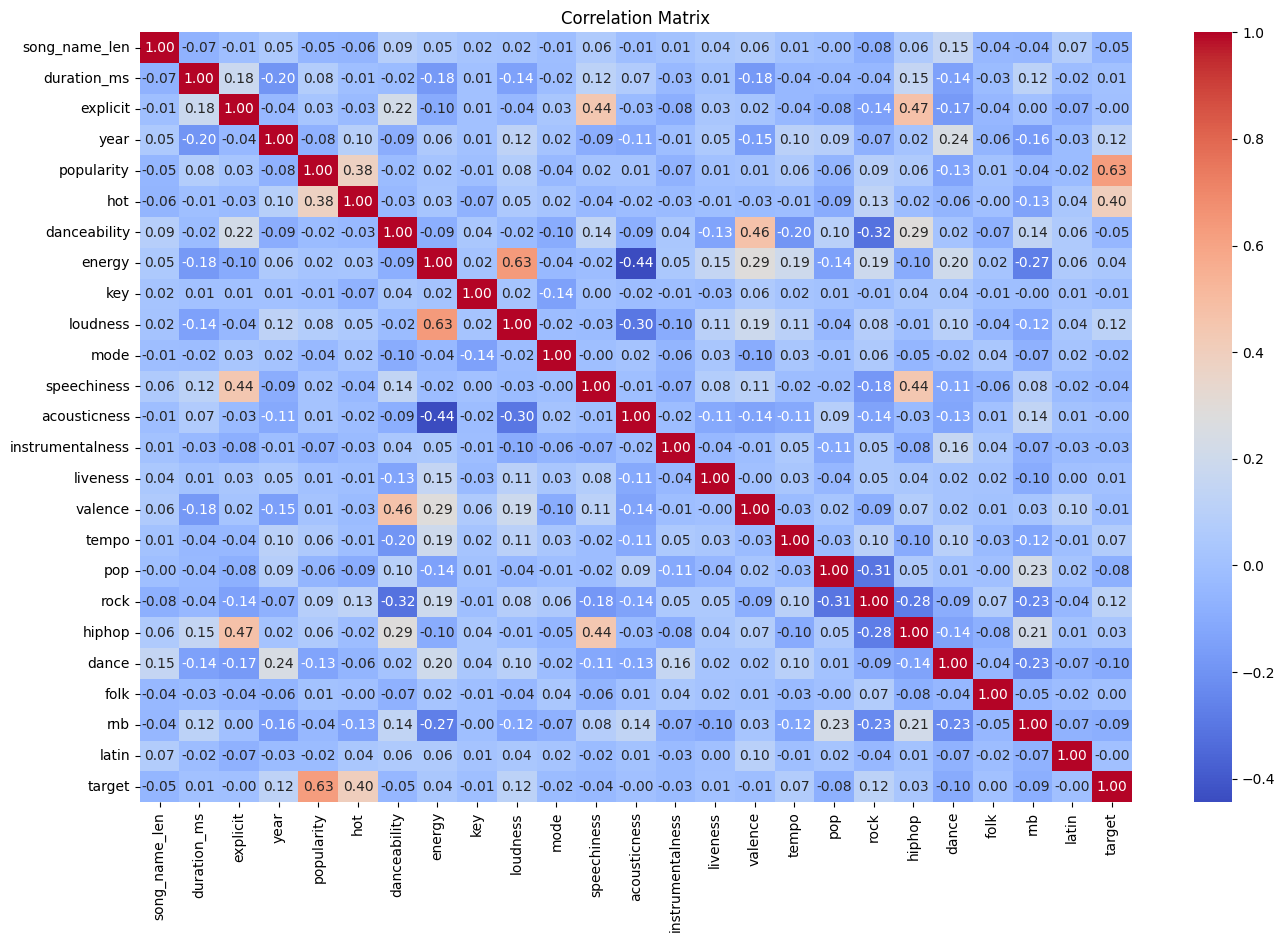

In [ ]:
plt.figure(figsize=(16, 10))
# Only include numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Convert 'explicit' to numeric (0 or 1)
if df['explicit'].dtype == 'object':
    df['explicit'] = df['explicit'].apply(lambda x: 1 if x == 'True' or x == True else 0)


In [ ]:
# Drop text columns that are not helpful for prediction
df = df.drop(columns=['artist', 'song', 'genre'], errors='ignore')


In [ ]:
# Create a new binary column: 1 if popularity ≥ 65, else 0
df['target'] = (df['popularity'] >= 65).astype(int)


In [ ]:
# Preview cleaned dataset again
print("\nPreview of Cleaned Data:")
df.head()



Preview of Cleaned Data:


song_name_len  duration_ms  explicit    year  popularity  hot  \
0           22.0     211160.0         0  2000.0        77.0  1.0   
1           20.0     167066.0         0  1999.0        79.0  1.0   
2            7.0     250546.0         0  1999.0        66.0  0.0   
3           12.0     224493.0         0  2000.0        78.0  1.0   
4           11.0     200560.0         0  2000.0        65.0  0.0   

   danceability  energy  key  loudness  ...  valence    tempo  pop  rock  \
0         0.751   0.834  1.0    -5.444  ...    0.894   95.053  1.0   0.0   
1         0.434   0.897  0.0    -4.918  ...    0.684  148.726  1.0   1.0   
2         0.529   0.496  7.0    -9.007  ...    0.278  136.859  1.0   0.0   
3         0.551   0.913  0.0    -4.063  ...    0.544  119.992  0.0   1.0   
4         0.614   0.928  8.0    -4.806  ...    0.879  172.656  1.0   0.0   

   hiphop  dance  folk  rnb  latin  target  
0     0.0    0.0   0.0  0.0    0.0       1  
1     0.0    0.0   0.0  0.0    0.0       1  
2     0.0    0.0   0.0  0.0    0.0       1  
3     0.0    0.0   0.0  0.0    0.0       1  
4     0.0    0.0   0.0  0.0    0.0       1  

[5 rows x 25 columns]

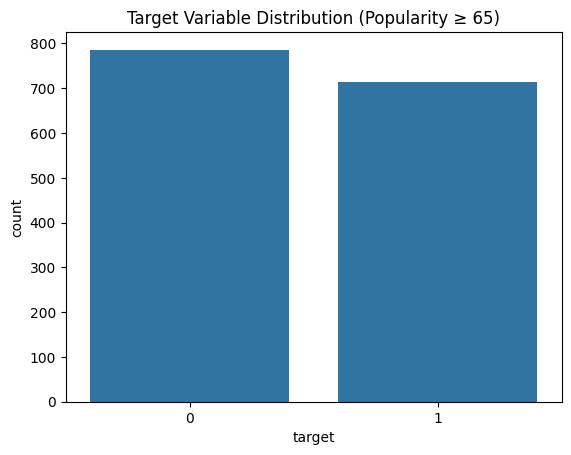

In [ ]:
sns.countplot(data=df, x='target')
plt.title("Target Variable Distribution (Popularity ≥ 65)")
plt.show()


In [ ]:
# Save cleaned dataset to a new CSV file
df.to_csv('/content/drive/MyDrive/cleaned_songs_utf_final.csv', index=False)

In [ ]:
import pandas as pd

# Load the dataset you just uploaded
df = pd.read_csv('/content/drive/MyDrive/INFO648/Data/cleaned_songs_utf_final.csv')  # or update the path if needed

# Remove rows with missing values
df_cleaned = df.dropna()

# Confirm it's fully clean
print("Shape after dropping missing:", df_cleaned.shape)
print("Remaining missing values:\n", df_cleaned.isnull().sum())

Shape after dropping missing: (1500, 25)
Remaining missing values:
 song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
target              0
dtype: int64


# KNN

In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For model training and evaluation
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from yellowbrick.classifier import ClassificationReport

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Read the dataset
file_path = '/content/drive/MyDrive/INFO648/Data/cleaned_songs_utf_final.csv'
df = pd.read_csv(file_path)

# Check stats
df.describe()

song_name_len    duration_ms     explicit         year   popularity  \
count    1500.000000    1500.000000  1500.000000  1500.000000  1500.000000   
mean       17.552667  234667.923333     0.244000  2007.034000    59.414000   
std        11.541289   38723.131986     0.429636     4.567722    19.346045   
min         2.000000  127920.000000     0.000000  1998.000000     0.000000   
25%         9.000000  209116.500000     0.000000  2003.000000    56.000000   
50%        14.000000  228973.000000     0.000000  2007.000000    64.000000   
75%        23.000000  254086.000000     0.000000  2011.000000    71.000000   
max        75.000000  484146.000000     1.000000  2020.000000    89.000000   

               hot  danceability       energy          key     loudness  ...  \
count  1500.000000   1500.000000  1500.000000  1500.000000  1500.000000  ...   
mean      0.128000      0.659393     0.737019     5.365333    -5.434571  ...   
std       0.334201      0.142157     0.151874     3.587447     1.915075  ...   
min       0.000000      0.129000     0.054900     0.000000   -20.514000  ...   
25%       0.000000      0.568000     0.645750     2.000000    -6.452500  ...   
50%       0.000000      0.670000     0.754000     6.000000    -5.179000  ...   
75%       0.000000      0.758000     0.857250     8.000000    -4.142500  ...   
max       1.000000      0.975000     0.999000    11.000000    -0.276000  ...   

           valence        tempo          pop         rock       hiphop  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.573458   119.884948     0.823333     0.134000     0.385333   
std       0.221088    26.762101     0.381514     0.340766     0.486836   
min       0.038100    60.019000     0.000000     0.000000     0.000000   
25%       0.411000    98.551250     1.000000     0.000000     0.000000   
50%       0.584000   120.092500     1.000000     0.000000     0.000000   
75%       0.755250   133.126250     1.000000     0.000000     1.000000   
max       0.973000   210.851000     1.000000     1.000000     1.000000   

             dance         folk          rnb        latin      target  
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.00000  
mean      0.158000     0.010667     0.264667     0.025333     0.47600  
std       0.364863     0.102762     0.441303     0.157188     0.49959  
min       0.000000     0.000000     0.000000     0.000000     0.00000  
25%       0.000000     0.000000     0.000000     0.000000     0.00000  
50%       0.000000     0.000000     0.000000     0.000000     0.00000  
75%       0.000000     0.000000     1.000000     0.000000     1.00000  
max       1.000000     1.000000     1.000000     1.000000     1.00000  

[8 rows x 25 columns]

In [ ]:
# Check & drop missing values
print("Missing values before drop:")
print(df.isna().sum())
df.dropna(inplace=True)
print("Missing values after drop:")
print(df.isna().sum())

Missing values before drop:
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
target              0
dtype: int64
Missing values after drop:
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
pop     

In [ ]:
# Select useful features + target
features = ['danceability', 'energy', 'acousticness', 'instrumentalness',
            'valence', 'tempo', 'speechiness', 'duration_ms',
            'pop', 'rock', 'hiphop', 'dance', 'folk', 'rnb', 'latin']
df_sub = df[features + ['popularity']].copy()

# Create target variable: popular = 1 if popularity ≥ 65
df_sub['popular'] = (df_sub['popularity'] >= 65).astype(int)
df_sub.drop(columns=['popularity'], inplace=True)

# Print class distribution
print("Class counts:")
print(df_sub['popular'].value_counts())

Class counts:
popular
0    786
1    714
Name: count, dtype: int64


In [ ]:
# Define features and target
X = df_sub.drop('popular', axis=1)
y = df_sub['popular']
feature_names = X.columns.tolist()
class_names = ['Not Popular', 'Popular']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [ ]:
# Create evaluation table
eval_original = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        knn_model.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})
display(eval_original)

Evaluation Metric     Value
0    Train Accuracy  0.758095
1     Test Accuracy  0.586667
2            Recall  0.539474
3         Precision  0.602941
4          F1 Score  0.569444

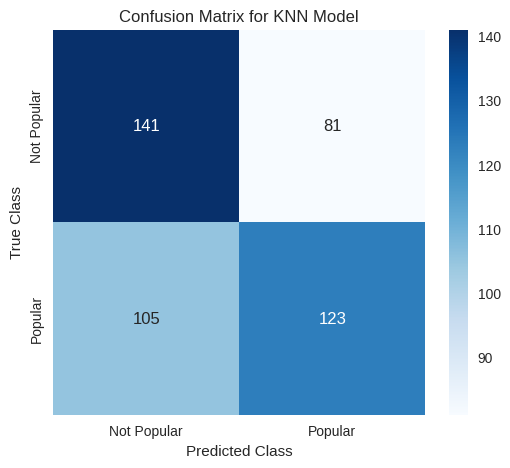

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for KNN Model')
plt.show()

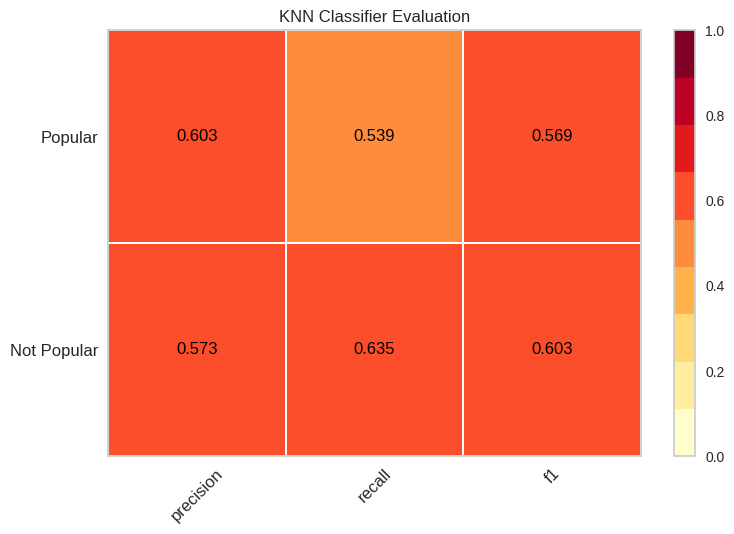

<Axes: title={'center': 'KNN Classifier Evaluation'}>

In [ ]:
visualizer = ClassificationReport(knn_model, classes=class_names, support=False, title="KNN Classifier Evaluation")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
y_cv_pred = cross_val_predict(knn_model, X_scaled, y, cv=10)
conf_matrix_cv = confusion_matrix(y, y_cv_pred)

eval_cv = pd.DataFrame({
    "Evaluation Metric_CV": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        accuracy_score(y, y_cv_pred),
        recall_score(y, y_cv_pred),
        precision_score(y, y_cv_pred),
        f1_score(y, y_cv_pred)
    ]
})
print("Cross-Validated Performance:")
display(eval_cv)

Cross-Validated Performance:


Evaluation Metric_CV     Value
0             Accuracy  0.562000
1               Recall  0.549020
2            Precision  0.539202
3             F1 Score  0.544067

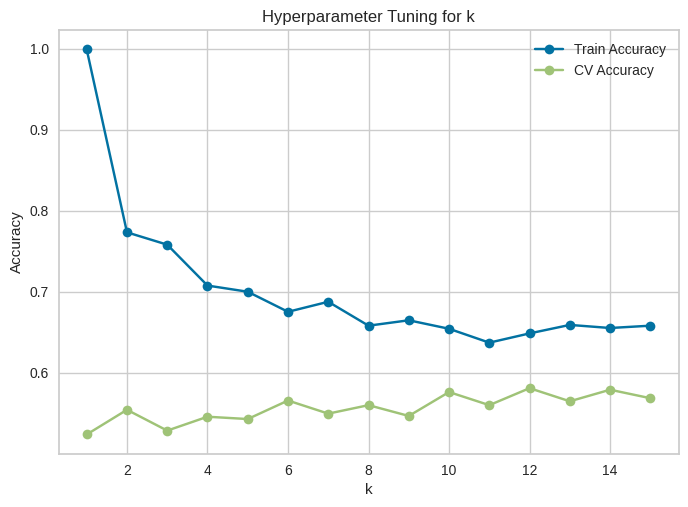

In [ ]:
k_range = range(1, 16)
train_accuracies = []
cv_accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    cv_accuracies.append(cv_score)

plt.plot(k_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_range, cv_accuracies, label='CV Accuracy', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning for k')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
param_grid = {
    'n_neighbors': [8, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

result = pd.DataFrame(grid_knn.cv_results_['params'])
result['mean_CV_test_score'] = grid_knn.cv_results_['mean_test_score']
display(result.sort_values(by='mean_CV_test_score', ascending=False))

metric  n_neighbors   weights  mean_CV_test_score
3  euclidean           11  distance            0.574286
5  euclidean           13  distance            0.570476
6  euclidean           15   uniform            0.568571
7  euclidean           15  distance            0.567619
4  euclidean           13   uniform            0.564762
0  euclidean            8   uniform            0.560000
2  euclidean           11   uniform            0.560000
1  euclidean            8  distance            0.542857

In [ ]:
# Use best parameters from grid search
tuned_knn_model = KNeighborsClassifier(n_neighbors=13, weights='distance', metric='euclidean')
tuned_knn_model.fit(X_train, y_train)
y_pred_tuned = tuned_knn_model.predict(X_test)

In [ ]:
comparison = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Original KNN': [
        knn_model.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ],
    'Tuned KNN': [
        tuned_knn_model.score(X_train, y_train),
        accuracy_score(y_test, y_pred_tuned),
        precision_score(y_test, y_pred_tuned),
        recall_score(y_test, y_pred_tuned),
        f1_score(y_test, y_pred_tuned)
    ]
})
display(comparison)

Metric  Original KNN  Tuned KNN
0  Train Accuracy      0.758095   0.999048
1   Test Accuracy      0.586667   0.577778
2       Precision      0.602941   0.610465
3          Recall      0.539474   0.460526
4        F1 Score      0.569444   0.525000

# Decision Tree

In [ ]:
# import libraries

# For data manipulation
import pandas as pd
import numpy as np

# For model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
%matplotlib inline

**Read the Data and Check the Stats & Columns**

In [ ]:
# import data as dataframe
file_path = '/content/drive/MyDrive/INFO648/Data/cleaned_songs_utf_final.csv'
df = pd.read_csv(file_path)

# calling head() method
df.head()

song_name_len  duration_ms  explicit    year  popularity  hot  \
0           22.0     211160.0         0  2000.0        77.0  1.0   
1           20.0     167066.0         0  1999.0        79.0  1.0   
2            7.0     250546.0         0  1999.0        66.0  0.0   
3           12.0     224493.0         0  2000.0        78.0  1.0   
4           11.0     200560.0         0  2000.0        65.0  0.0   

   danceability  energy  key  loudness  ...  valence    tempo  pop  rock  \
0         0.751   0.834  1.0    -5.444  ...    0.894   95.053  1.0   0.0   
1         0.434   0.897  0.0    -4.918  ...    0.684  148.726  1.0   1.0   
2         0.529   0.496  7.0    -9.007  ...    0.278  136.859  1.0   0.0   
3         0.551   0.913  0.0    -4.063  ...    0.544  119.992  0.0   1.0   
4         0.614   0.928  8.0    -4.806  ...    0.879  172.656  1.0   0.0   

   hiphop  dance  folk  rnb  latin  target  
0     0.0    0.0   0.0  0.0    0.0       1  
1     0.0    0.0   0.0  0.0    0.0       1  
2     0.0    0.0   0.0  0.0    0.0       1  
3     0.0    0.0   0.0  0.0    0.0       1  
4     0.0    0.0   0.0  0.0    0.0       1  

[5 rows x 25 columns]

**Now lets check how many categorical/numeric variables we have**

In [ ]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object" and col not in "target"] ##exclude our target variable: customer status
numeric_variables

['song_name_len',
 'duration_ms',
 'explicit',
 'year',
 'popularity',
 'hot',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'pop',
 'rock',
 'hiphop',
 'dance',
 'folk',
 'rnb',
 'latin']

In [ ]:
categorical_variables = [col for col in df.columns if df[col].dtype == "O" and col != "target"]  ###exclude our target: "Customer Status"
categorical_variables

[]

**Select the variables we are interested in**

In [ ]:
df_sub = df[[ 'song_name_len',  'explicit',
       'danceability', 'energy', 'speechiness',
       'valence', 'tempo',
       'pop', 'hiphop', 'target']]

**Now lets check our target variable**

In [ ]:
display(df_sub['target'].value_counts())
##Our target variable is a numerical variable

target
0    786
1    714
Name: count, dtype: int64

**Let see how each feature is related to our target variable**

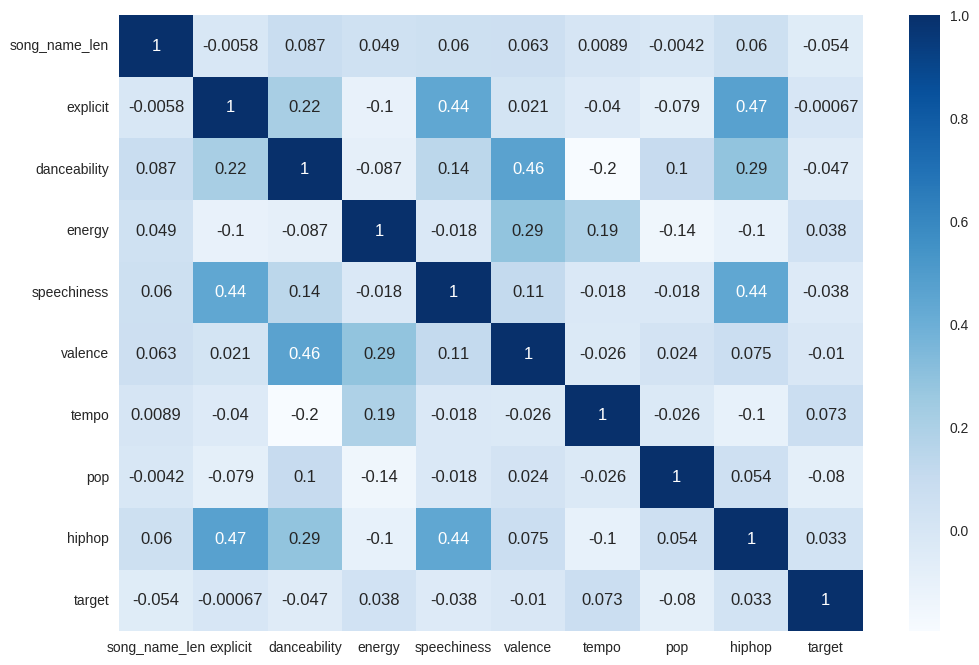

In [ ]:
corr_matrix = df_sub.corr()
plt.figure(figsize=(12,8)) ###change the figure size here
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
plt.show()

**Define features (X) and target (y), then split the data into training/testing sets**

In [ ]:
X = df_sub.drop('target', axis=1)  # Drop the target column to get independent variables
y = df_sub['target']  # Select the target column directly as our y


# Split the dataset into training and testing sets test_size using 0.3: 70% training and 30% testing
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=1)

**Train our first decision tree model**

In [ ]:
#criterion='entropy': Specifies that the decision tree should use entropy to measure the quality of a split.
#max_depth=12: Limits the maximum depth of the tree to 12 levels.
#min_samples_split=5: Specifies that a node must have at least 5 samples to be considered for splitting


dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split = 5, random_state=1)


###train the model
dt_clf = dt_clf.fit(X_train, y_train)

###making predictions on test data
y_pred = dt_clf.predict(X_test)

In [ ]:
#####run this step to mark the features to the plot we are going to generate
feature_names = X_train.columns.tolist()

# Automatically get all unique target classes
##It should give you the target label before we encode it

class_names = [str(c) for c in np.unique(y)]

##print out the features we selected for predictions and our classification target
print("features:",feature_names)
print("Classes:", class_names)

features: ['song_name_len', 'explicit', 'danceability', 'energy', 'speechiness', 'valence', 'tempo', 'pop', 'hiphop']
Classes: ['0', '1']


In [ ]:
###Text representation of our trained Decision Tree
from sklearn.tree import export_text
feature_names = X_train.columns.tolist()
text_representation = export_text(dt_clf, feature_names=feature_names)
print(text_representation)

|--- danceability <= 0.58
|   |--- pop <= 0.50
|   |   |--- danceability <= 0.41
|   |   |   |--- class: 1
|   |   |--- danceability >  0.41
|   |   |   |--- danceability <= 0.42
|   |   |   |   |--- class: 0
|   |   |   |--- danceability >  0.42
|   |   |   |   |--- tempo <= 83.03
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- tempo >  83.03
|   |   |   |   |   |--- tempo <= 94.71
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- tempo >  94.71
|   |   |   |   |   |   |--- valence <= 0.50
|   |   |   |   |   |   |   |--- tempo <= 142.02
|   |   |   |   |   |   |   |   |--- song_name_len <= 13.50
|   |   |   |   |   |   |   |   |   |--- energy <= 0.86
|   |   |   |   |   |   |   |   |   |   |--- speechiness <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- speechiness >  0.06
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- energy >  0.8

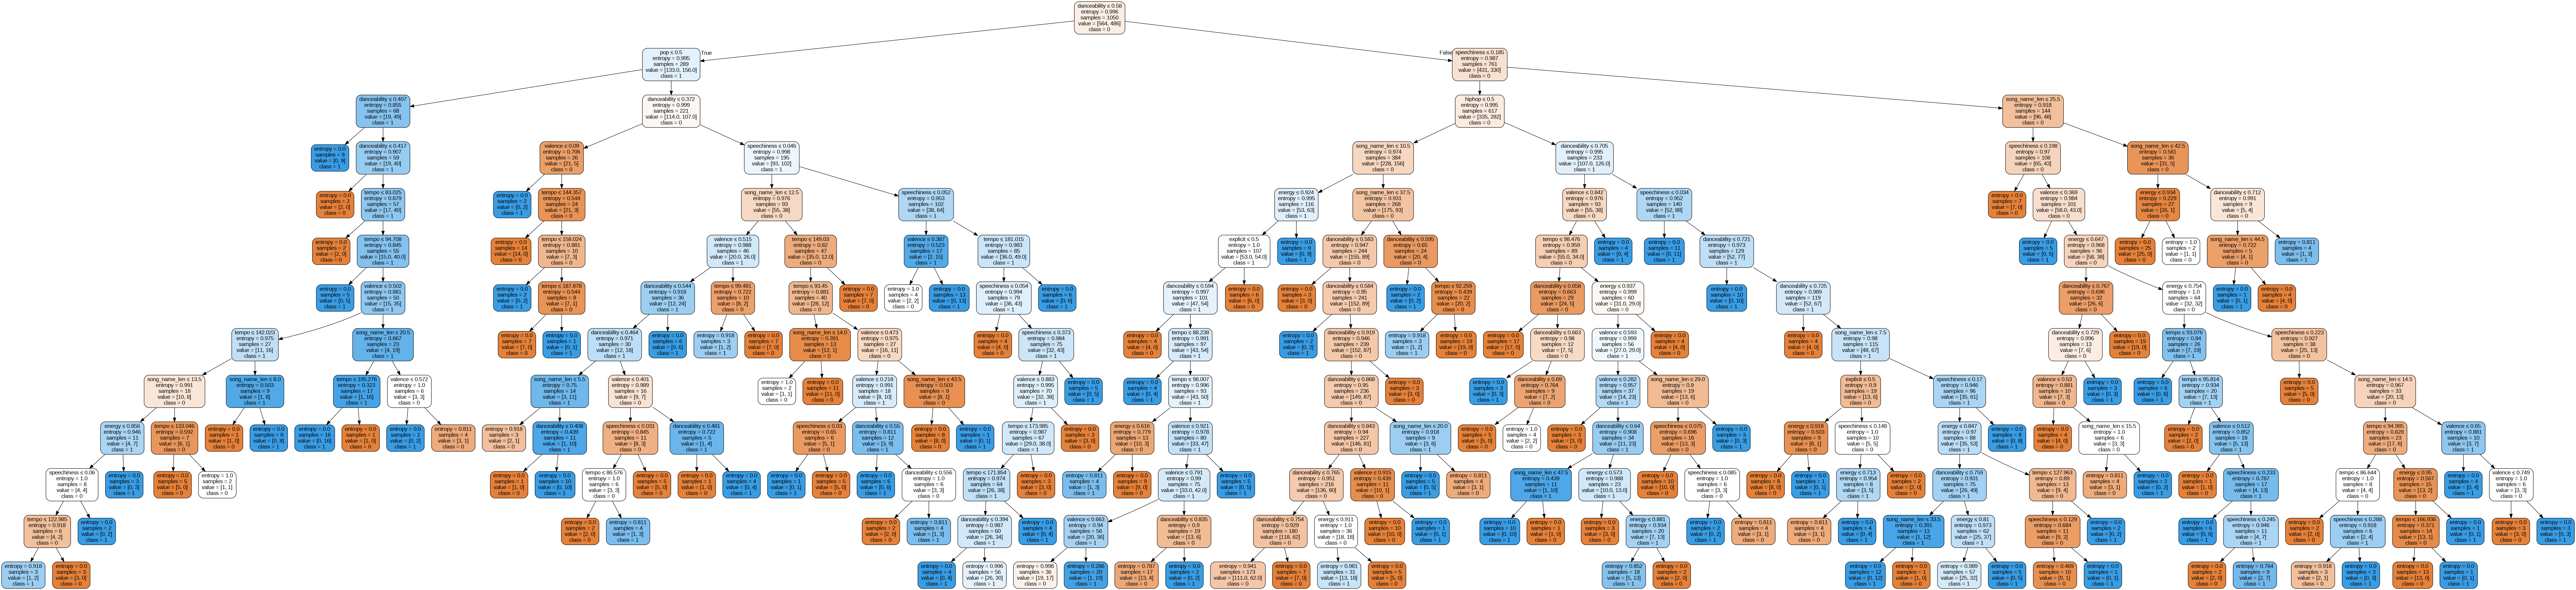

In [ ]:
###Figure visualization of our trained Decision Tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display



# Generate the DOT data for the tree
dot_data = export_graphviz(dt_clf,
                           out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create the Graphviz source object
decision_tree_graph = graphviz.Source(dot_data, format="png")
decision_tree_graph.render("decision_tree_graph")
# Display the decision tree within the notebook
display(Image(filename="decision_tree_graph.png"))

In [ ]:
##Uncomment this only if you want to save your decision tree image
##You need to create a folder called Image under My Drive first
#image_folder_path = '/content/drive/My Drive/Image/'
#decision_tree_graph.render(image_folder_path + "decision_tree_graph")

**Now lets evaluate our first decision tree**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        dt_clf.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

evaluation_metrics

Evaluation Metric     Value
0    Train Accuracy  0.831429
1     Test Accuracy  0.560000
2            Recall  0.478070
3         Precision  0.579787
4          F1 Score  0.524038

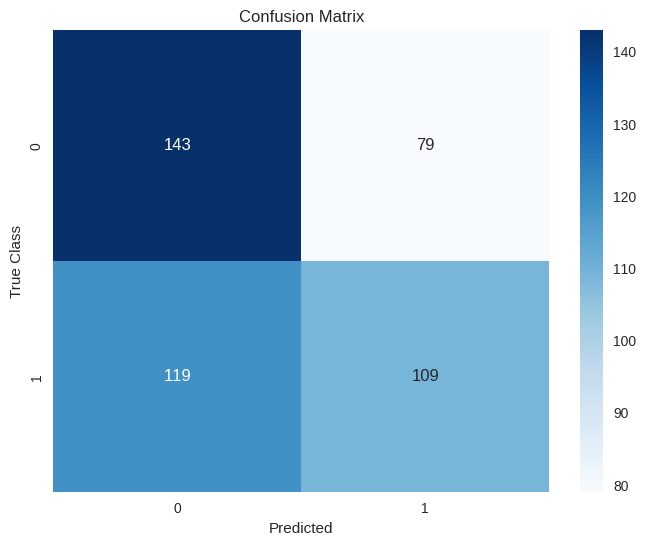

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))###change this number to adjust figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Class')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


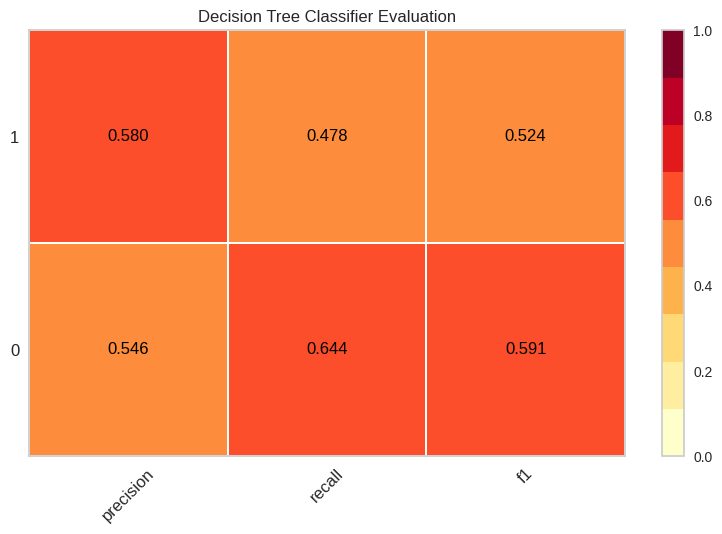

<Axes: title={'center': 'Decision Tree Classifier Evaluation'}>

In [ ]:
##Generate the evaluation figure for all the classes
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt_clf, classes=class_names, support=False, title = "Decision Tree Classifier Evaluation")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.ax.set_xticklabels(['Precision', 'Recall', 'F1'])
visualizer.show()

**Feature importance for predicting target**

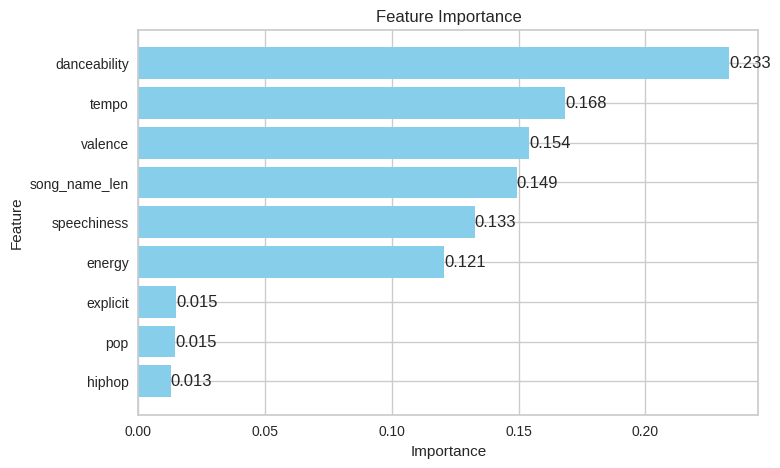

In [ ]:
#The feature importance values in a decision tree model indicate how much a particular feature contributes to the prediction of the target variable.
#The importance score is calculated based on how often and how effectively a feature is used to split the data
#Features that are used to split the data closer to the root of the tree or that result in greater reductions in entropy will have higher importance scores.
#The importance scores are typically normalized, meaning they sum up to 1 (or 100% when expressed as percentages).
#A higher score indicates a more important feature in determining the outcome of the target variable.


# Retrieve the feature importances from the trained model
feature_importances = dt_clf.feature_importances_
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 5))###########change this number to adjust figure size
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')    #.3f means the value is round up to 3 decimal places

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

**Cross-Validation Evaluation on the training set**

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict


# Perform cross-validation and get aggregated predictions across the entire training set
y_pred_cross = cross_val_predict(dt_clf, X_train, y_train, cv=10)


# Cross-Validation Results on Training Set
y_pred_cross = cross_val_predict(dt_clf, X_train, y_train, cv=10)

accuracy_cv = accuracy_score(y_train, y_pred_cross)
recall_cv = recall_score(y_train, y_pred_cross)
precision_cv = precision_score(y_train, y_pred_cross)
f1_cv = f1_score(y_train, y_pred_cross)
matrix_cv = confusion_matrix(y_train, y_pred_cross)

# Create DataFrame for evaluation metrics with cross-validation
evaluation_metrics_with_cv = pd.DataFrame({
    "Evaluation Metric_CV": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        accuracy_cv,
        accuracy_cv,  # Cross-validation doesn't separate train/test, so the same accuracy is used
        recall_cv,
        precision_cv,
        f1_cv
    ]
})

print("Performance Metrics With Cross-Validation:")
display(evaluation_metrics_with_cv)
print('\nConfusion Matrix CV:','\n', matrix_cv)


print("\nPerformance Metrics Without Cross-Validation:")
display(evaluation_metrics)
print('\nConfusion Matrix:','\n', conf_matrix)


## Alternatively, use cross_val_score to get the average performance metrics across folds/different data splits
# scores_acc = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='accuracy')
#scores_rc = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='recall')
#scores_prc = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='precision')
#scores_f1 = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='f1_macro')

#print('\nCross-Validation Scores on Training Set:')
#print('Average Accuracy: ', scores_acc.mean())
#print('Average Recall: ', scores_rc.mean())
#print('Average Precision: ', scores_prc.mean())
#print('Average F1-score: ', scores_f1.mean())

Performance Metrics With Cross-Validation:


Evaluation Metric_CV     Value
0       Train Accuracy  0.520952
1        Test Accuracy  0.520952
2               Recall  0.370370
3            Precision  0.477454
4             F1 Score  0.417149


Confusion Matrix CV: 
 [[367 197]
 [306 180]]

Performance Metrics Without Cross-Validation:


Evaluation Metric     Value
0    Train Accuracy  0.831429
1     Test Accuracy  0.560000
2            Recall  0.478070
3         Precision  0.579787
4          F1 Score  0.524038


Confusion Matrix: 
 [[143  79]
 [119 109]]


**Hyperparameter Fine-tuning (Pruning)**

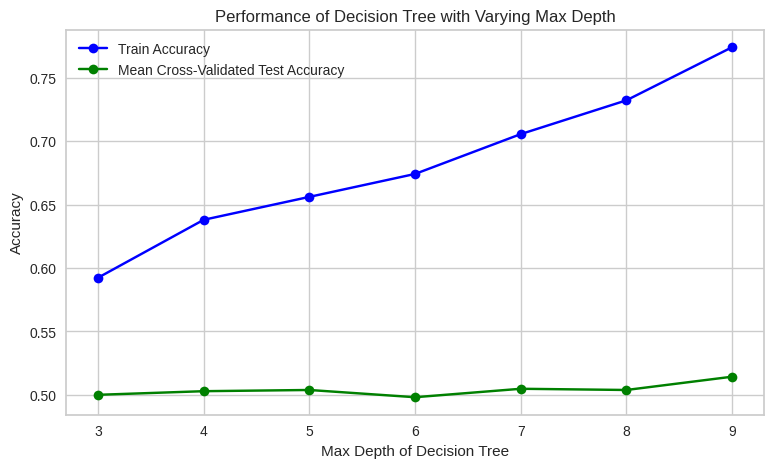

In [ ]:
# Define a range of max_depth values to evaluate
max_depth_range = range(3, 10)  # You can adjust the range as needed

# Lists to store performance metrics
train_accuracies = []
cv_test_accuracies = []

for depth in max_depth_range:
    # Initialize the model with the current max_depth
    dt_depth = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1)

    # Train the model on the full training set
    dt_depth.fit(X_train, y_train)

    # Calculate training accuracy
    y_pred_train = dt_depth.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_pred_train))

    # Perform cross-validation and calculate the mean accuracy
    cv_test_accuracy = cross_val_score(dt_depth, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_test_accuracies.append(cv_test_accuracy)

# Plot the performance metrics
plt.figure(figsize=(9, 5)) #################change this number to adjust figure size###########
plt.plot(max_depth_range, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.plot(max_depth_range, cv_test_accuracies, label='Mean Cross-Validated Test Accuracy', marker='o', color='green')

plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Performance of Decision Tree with Varying Max Depth')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameter_tuning_DT = DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': [3,4,5],
              'min_samples_split': [5, 10],
              'splitter': ['best'],}     # 'best': Selects the best split based on the highest information gain

grid_dt = GridSearchCV(hyperparameter_tuning_DT, param_grid = parameters, cv = 10 )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_CV_test_score'] = grid_dt.cv_results_['mean_test_score']
#result['std_test_score'] = grid_dt.cv_results_['std_test_score']
result.sort_values(by='mean_CV_test_score', ascending=False)

max_depth  min_samples_split splitter  mean_CV_test_score
0          3                  5     best            0.517143
1          3                 10     best            0.517143
2          4                  5     best            0.513333
3          4                 10     best            0.513333
4          5                  5     best            0.493333
5          5                 10     best            0.492381

**Now let's fine-tune our decision tree model**

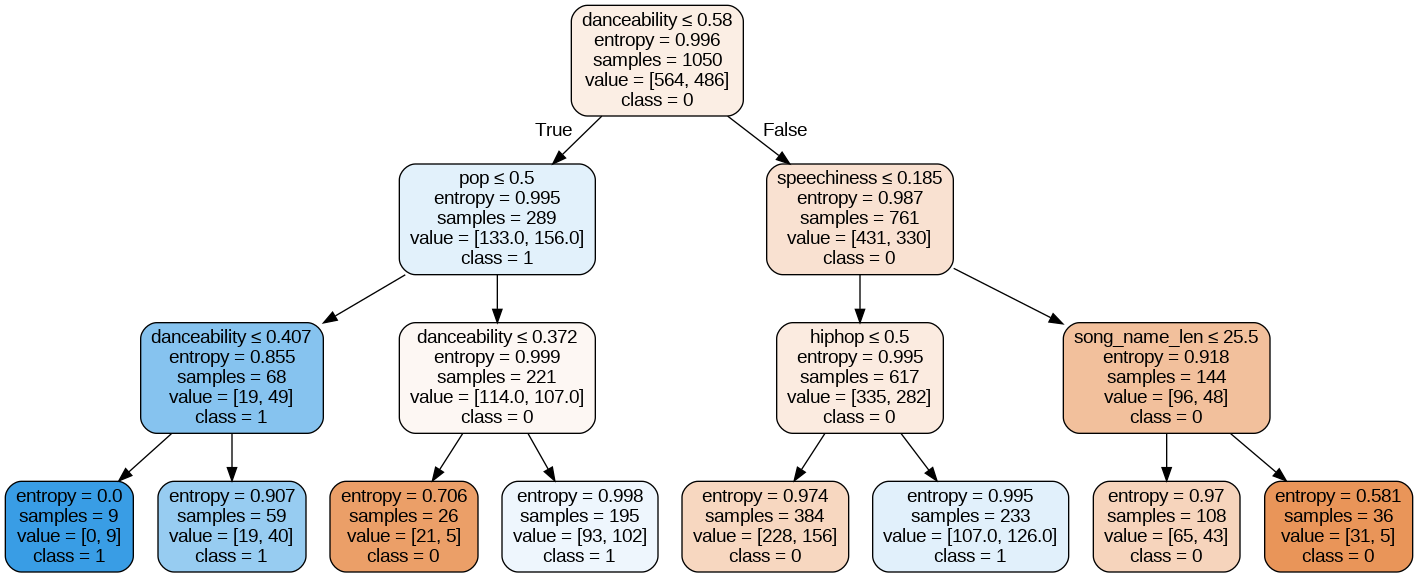

In [ ]:
dt_clf_tune = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split = 5, splitter= 'best', random_state=1)
dt_clf_tune = dt_clf_tune.fit(X_train, y_train)
y_pred_tune = dt_clf_tune.predict(X_test)


# Generate the DOT data for the tuned tree
dot_data_tune = export_graphviz(dt_clf_tune,
                           out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create the Graphviz source object
decision_tree_graph_tune = graphviz.Source(dot_data_tune)

# Render the graph to a PNG image
decision_tree_graph_tune = graphviz.Source(dot_data_tune, format="png")
decision_tree_graph_tune.render("decision_tree_graph_tune")

# Display the image within the notebook
Image(filename="decision_tree_graph_tune.png")

In [ ]:
##Uncomment this only if you want to save your decision tree image
##You need to create a folder called Image under My Drive first
#image_folder_path = '/content/drive/My Drive/Image/'
#decision_tree_graph_tune.render(image_folder_path + "decision_tree_graph_tune")

**Compare Performance: Original vs Tuned Decision Tree**

In [ ]:
# Original Decision Tree Performance Metrics
train_accuracy_original = dt_clf.score(X_train, y_train)
test_accuracy_original = accuracy_score(y_test, y_pred)
precision_original = precision_score(y_test, y_pred)
recall_original = recall_score(y_test, y_pred)
f1_original = f1_score(y_test, y_pred)
confusion_matrix_original = confusion_matrix(y_test, y_pred)

# Tuned Decision Tree Performance Metrics
train_accuracy_tuned = dt_clf_tune.score(X_train, y_train)
test_accuracy_tuned = accuracy_score(y_test, y_pred_tune)
precision_tuned = precision_score(y_test, y_pred_tune)
recall_tuned = recall_score(y_test, y_pred_tune)
f1_tuned = f1_score(y_test, y_pred_tune)
confusion_matrix_tuned = confusion_matrix(y_test, y_pred_tune)


# Create Comparison Table

# Create a DataFrame with the metrics
comparison_df = pd.DataFrame({
    'Evaluation Metric': ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Original Decision Tree': [train_accuracy_original, test_accuracy_original, precision_original, recall_original, f1_original],
    'Tuned Decision Tree': [train_accuracy_tuned, test_accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]
})

# Set precision for floating point numbers
pd.set_option("display.precision", 4)

# Display the comparison table

display(comparison_df)

Evaluation Metric  Original Decision Tree  Tuned Decision Tree
0    Train Accuracy                  0.8314               0.5924
1     Test Accuracy                  0.5600               0.5489
2         Precision                  0.5798               0.5561
3            Recall                  0.4781               0.5439
4          F1 Score                  0.5240               0.5499

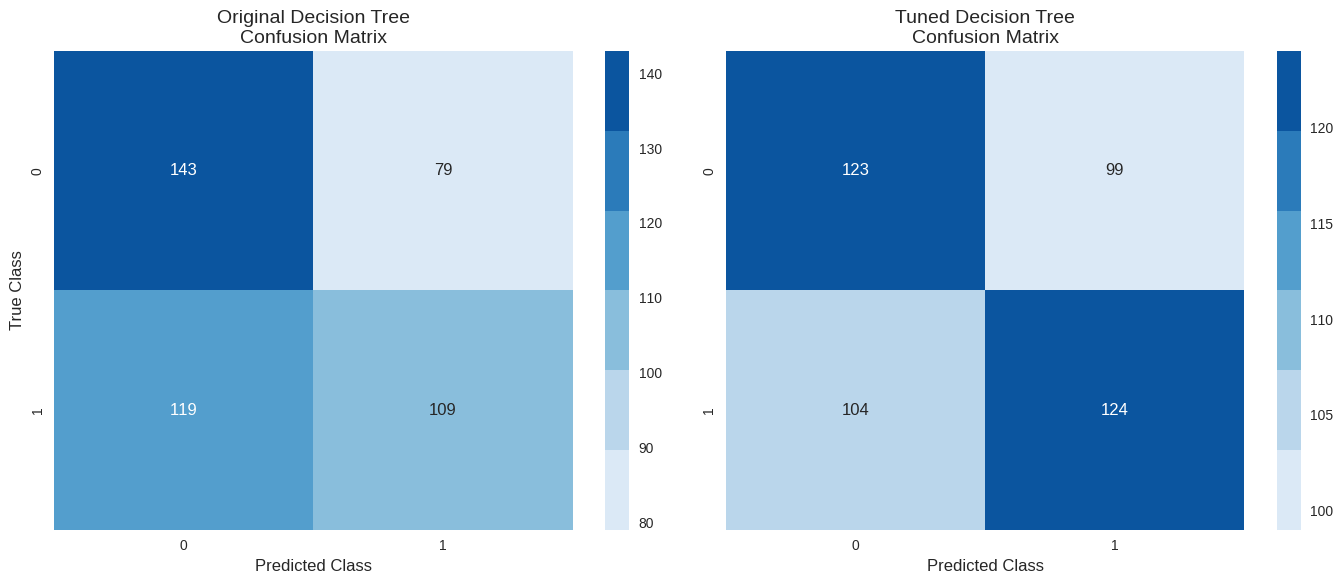

In [ ]:
# Compare Confusion Matrices


# Set up the matplotlib figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))####change figure size here

# Define a common color map
cmap = sns.color_palette("Blues")

# Plot Confusion Matrix for Original Decision Tree
sns.heatmap(confusion_matrix_original, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Original Decision Tree\nConfusion Matrix', fontsize=14)
axes[0].set_xlabel('Predicted Class', fontsize=12)
axes[0].set_ylabel('True Class', fontsize=12)

# Plot Confusion Matrix for Tuned Decision Tree
sns.heatmap(confusion_matrix_tuned, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Tuned Decision Tree\nConfusion Matrix', fontsize=14)
axes[1].set_xlabel('Predicted Class', fontsize=12)
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

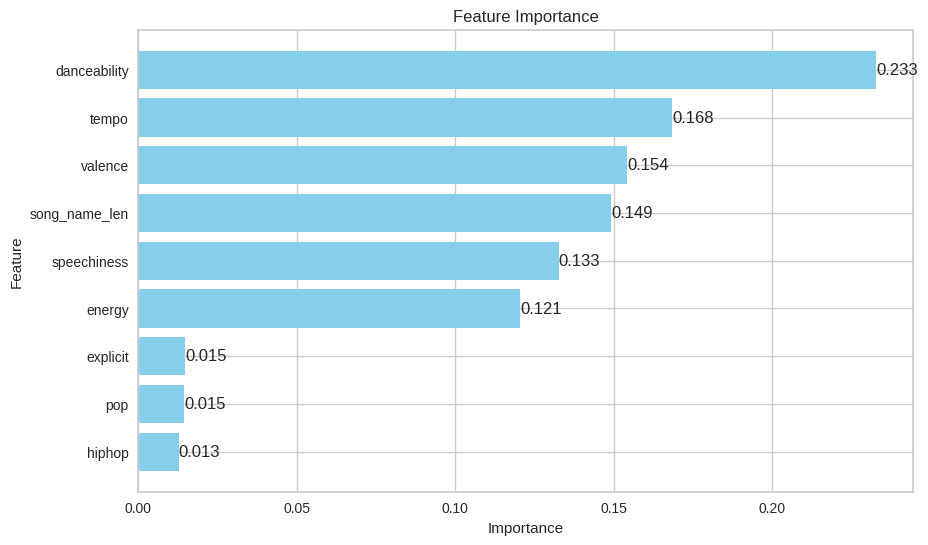

In [ ]:
# Let's check if the feature importance changes for the tuned model
# It should not change much because we only tuned the hyperparameters

feature_importances_tune = dt_clf_tune.feature_importances_

feature_importance_tune_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_tune_df = feature_importance_tune_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))###########change this number to adjust figure size
plt.barh(feature_importance_tune_df['Feature'], feature_importance_tune_df['Importance'], color='skyblue')

for index, value in enumerate(feature_importance_tune_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')    #.3f means the value is round up to 3 decimal places

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

**Cost Benefit Analysis:**

The revenue and costs are tied to the confusion matrix. The revenue for correctly predicting a popular song is 1,000 dollars. The cost for incorrectly predicting a song is popular, when in fact it is not, is 700 dollars. The cost for incorrectly predicting a song is not popular, when in fact it is, is 900 dollars. There is no cost or revenue for correctly predicting a song is non-popular.

Revenue for correctly predicting a popular song: **1000 dollars**

Cost for incorrectly predicting a non-popular song as popular: **-700 dollars**

Cost for incorrectly predicting a popular song as non-populars: **-900 dollars**

Therefore, from the confusion matrix:

TP = 124

FP = 99

FN = 104

TN = 123

Total Value = (124 × 1000) + (99 × -700) + (104 × -900)
            = 124,000 – 69,300 – 93,600
            = **–$38,900**


# Logistic Regression

In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For model training and evaluation
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
%matplotlib inline

In [ ]:
display(df.isna().sum()) ##check missing value
df = df.dropna() ##drop missing value

song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
target              0
dtype: int64

In [ ]:
display(df.isna().sum()) ##recheck missing value again

song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
target              0
dtype: int64

In [ ]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object" and col not in "Customer Status"] ##exclude our target variable: customer status
numeric_variables

['song_name_len',
 'duration_ms',
 'explicit',
 'year',
 'popularity',
 'hot',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'pop',
 'rock',
 'hiphop',
 'dance',
 'folk',
 'rnb',
 'latin',
 'target']

Examine correlation among independent variables

In [ ]:
df_test  = df[["song_name_len", "duration_ms","explicit","year","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","pop","rock","hiphop","dance","folk","rnb","latin","target"]]

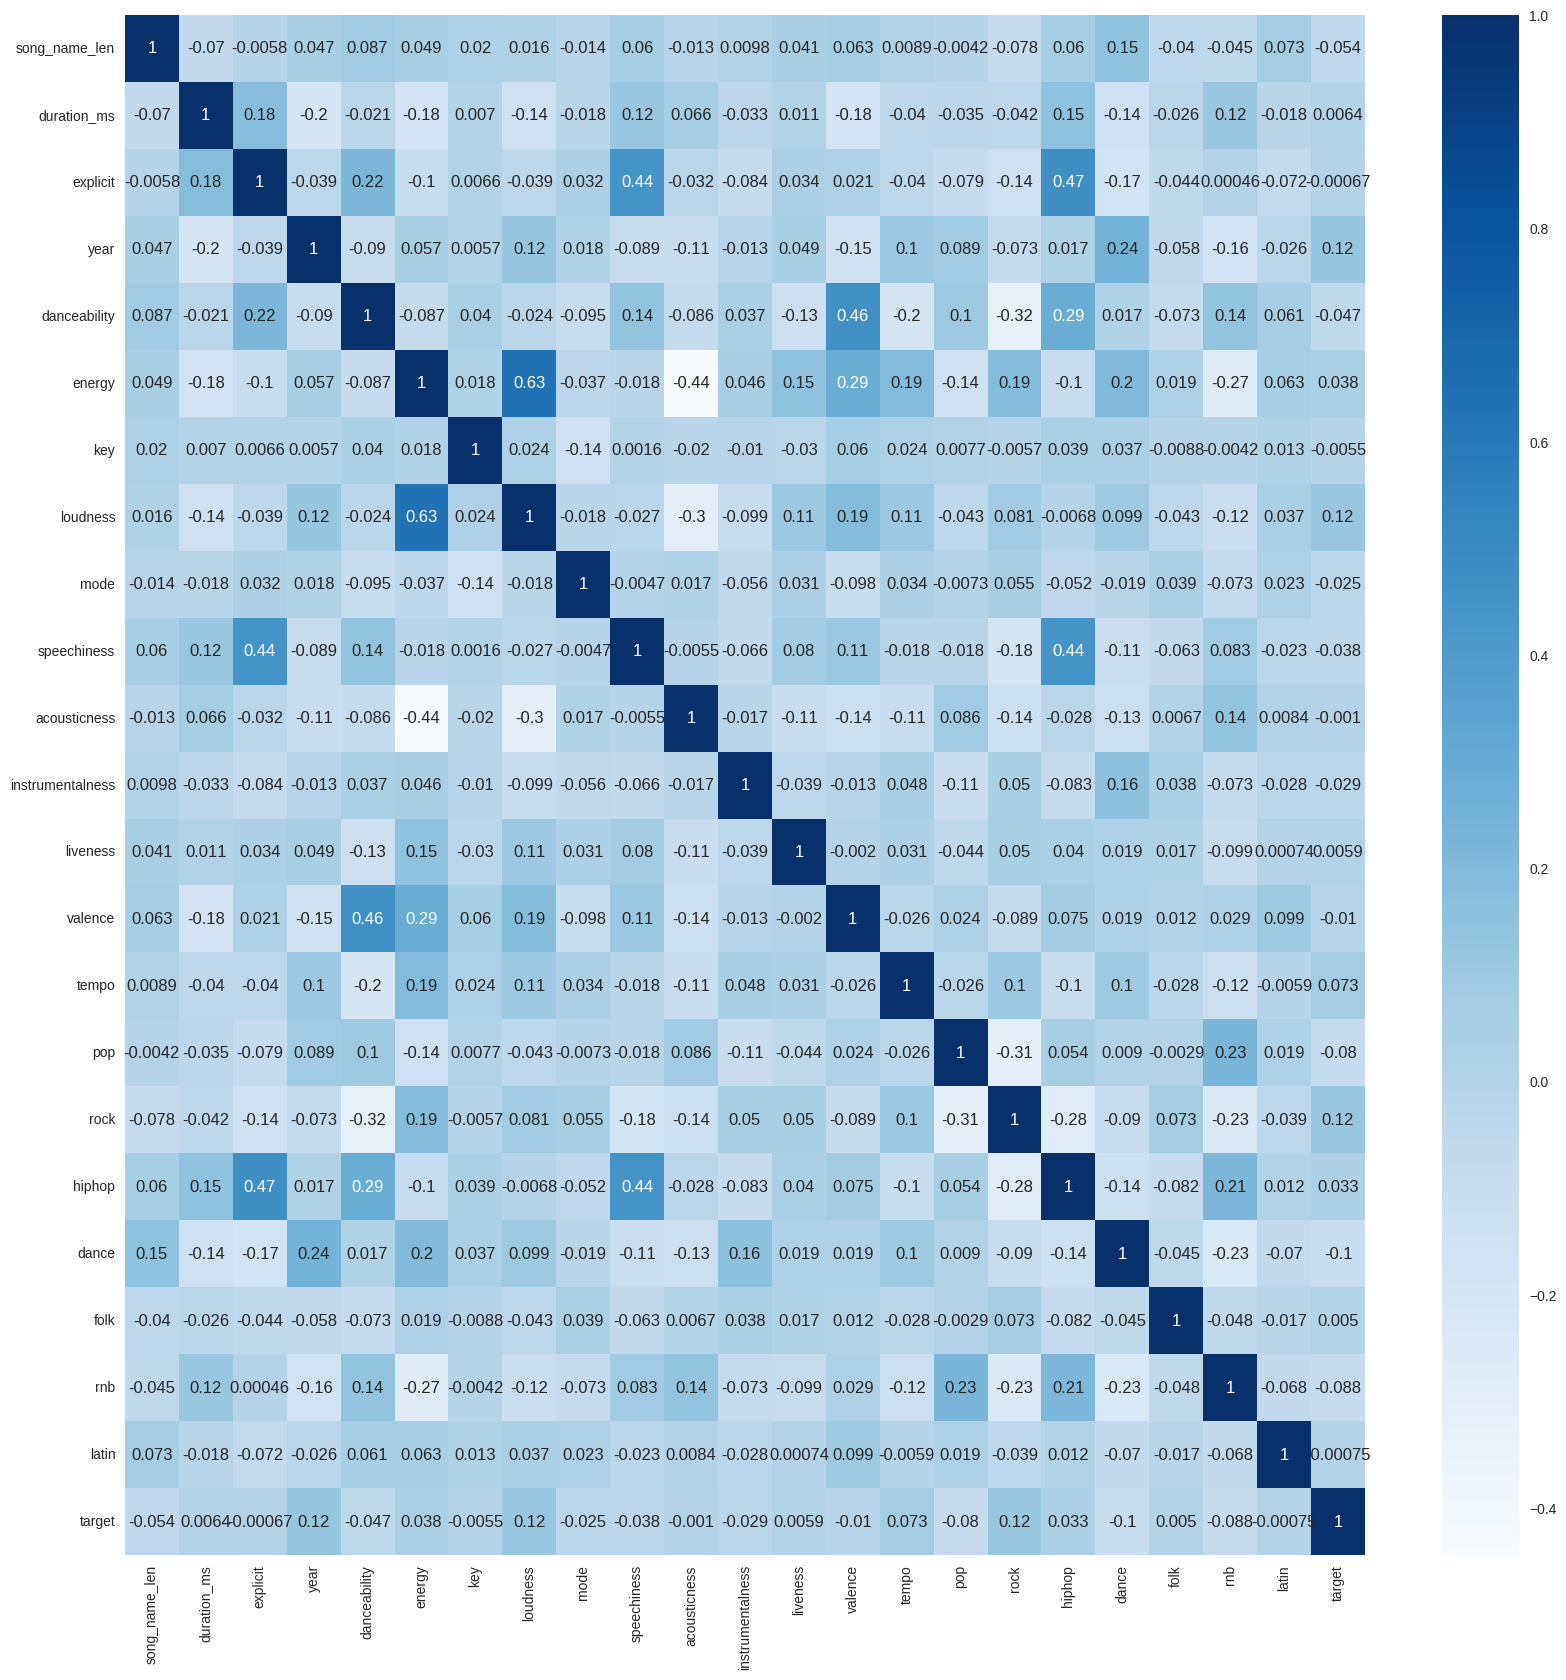

In [ ]:
corr_matrix = df_test.corr()
plt.figure(figsize=(20,20)) ###change the figure size here
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
plt.show()

**Multicollinearity check**

VIF stands for Variance Inflation Factor, measures how much the variance of a regression coefficient is inflated due to multicollinearity with other variables in the model.

It is used to detect the presence of multicollinearity in a regression analysis. Multicollinearity occurs when two or more predictor variables (independent variables) in a regression model are highly correlated, meaning that they provide redundant information and affect the reliability of the regression coefficients.

VIF = 1: No multicollinearity. The predictor is not correlated with any other variables.

VIF between 1 and 5: Moderate multicollinearity. Generally acceptable, though closer to 5 might be a concern.

VIF > 5: High multicollinearity. The predictor is highly correlated with other predictors, which may affect the reliability of the coefficient estimates.

VIF > 10: Severe multicollinearity. The predictor is very highly correlated with other variables, and steps should be taken to reduce multicollinearity (e.g., removing one of the correlated variables).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.values, i)
                          for i in range(len(df_test.columns))]

print(vif_data)

             feature       VIF
0      song_name_len    3.4993
1        duration_ms   42.0181
2           explicit    2.0667
3               year  228.9855
4       danceability   38.7792
5             energy   59.0882
6                key    3.3321
7           loudness   16.1368
8               mode    2.4036
9        speechiness    3.0149
10      acousticness    1.9881
11  instrumentalness    1.1265
12          liveness    2.8022
13           valence   12.1947
14             tempo   23.2552
15               pop    6.7018
16              rock    1.6054
17            hiphop    2.6305
18             dance    1.4981
19              folk    1.0409
20               rnb    1.7785
21             latin    1.0823
22            target    2.0412


In [ ]:
df_test_2 = df[["song_name_len", "duration_ms","explicit","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","pop","rock","hiphop","dance","folk","rnb","latin","target"]]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test_2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test_2.values, i)
                          for i in range(len(df_test_2.columns))]

print(vif_data)

             feature      VIF
0      song_name_len   3.4773
1        duration_ms  33.6348
2           explicit   2.0653
3       danceability  31.0518
4             energy  33.6691
5                key   3.3005
6           loudness  11.8672
7               mode   2.3539
8        speechiness   3.0143
9       acousticness   1.8329
10  instrumentalness   1.1188
11          liveness   2.7708
12           valence  12.0885
13             tempo  21.0646
14               pop   6.3952
15              rock   1.5794
16            hiphop   2.6294
17             dance   1.4981
18              folk   1.0408
19               rnb   1.7642
20             latin   1.0795
21            target   2.0125


In [ ]:
df_test_3 = df[["song_name_len","explicit","danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","pop","rock","hiphop","dance","folk","rnb","latin","target"]]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test_3.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test_3.values, i)
                          for i in range(len(df_test_3.columns))]

print(vif_data)

             feature      VIF
0      song_name_len   3.4758
1           explicit   2.0478
2       danceability  29.0769
3             energy  28.1919
4                key   3.2849
5           loudness  10.1418
6               mode   2.3508
7        speechiness   3.0106
8       acousticness   1.7947
9   instrumentalness   1.1153
10          liveness   2.7524
11           valence  11.5805
12             tempo  20.5273
13               pop   6.3801
14              rock   1.5743
15            hiphop   2.6241
16             dance   1.4904
17              folk   1.0407
18               rnb   1.7338
19             latin   1.0794
20            target   2.0034


In [ ]:
df_test_4 = df[["song_name_len","explicit","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","pop","rock","hiphop","dance","folk","rnb","latin","target"]]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test_4.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test_4.values, i)
                          for i in range(len(df_test_4.columns))]

print(vif_data)

             feature      VIF
0      song_name_len   3.4429
1           explicit   1.9849
2             energy  25.5760
3                key   3.2701
4           loudness   8.4390
5               mode   2.3461
6        speechiness   2.9981
7       acousticness   1.7944
8   instrumentalness   1.1117
9           liveness   2.7362
10           valence   8.9383
11             tempo  20.5236
12               pop   6.2413
13              rock   1.5412
14            hiphop   2.5609
15             dance   1.4876
16              folk   1.0362
17               rnb   1.7144
18             latin   1.0791
19            target   1.9918


In [ ]:
df_test_5 = df[["song_name_len","explicit","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","pop","rock","hiphop","dance","folk","rnb","latin","target"]]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test_5.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test_5.values, i)
                          for i in range(len(df_test_5.columns))]

print(vif_data)

             feature      VIF
0      song_name_len   3.3825
1           explicit   1.9842
2                key   3.2208
3           loudness   8.3141
4               mode   2.3178
5        speechiness   2.9818
6       acousticness   1.7600
7   instrumentalness   1.1084
8           liveness   2.6278
9            valence   6.9214
10             tempo  14.2171
11               pop   6.0505
12              rock   1.4671
13            hiphop   2.5587
14             dance   1.4605
15              folk   1.0350
16               rnb   1.7115
17             latin   1.0780
18            target   1.9764


In [ ]:
df_test_6 = df[["song_name_len","explicit","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","pop","rock","hiphop","dance","folk","rnb","latin","target"]]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_test_6.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test_6.values, i)
                          for i in range(len(df_test_6.columns))]

print(vif_data)

             feature     VIF
0      song_name_len  3.3227
1           explicit  1.9799
2                key  3.1211
3           loudness  7.4604
4               mode  2.2448
5        speechiness  2.9605
6       acousticness  1.7593
7   instrumentalness  1.1054
8           liveness  2.5577
9            valence  6.2826
10               pop  5.6016
11              rock  1.3923
12            hiphop  2.5556
13             dance  1.4264
14              folk  1.0333
15               rnb  1.7115
16             latin  1.0780
17            target  1.8849


**Select our features and our target variable**

In [ ]:
df_sub = df[["song_name_len","acousticness","loudness","rock","hiphop","dance","rnb","target"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder
####We are only interested in why people stayed and churned
df_sub = df_sub[df_sub['target'] !='Joined'] # we drop all the new customers

####Encode our target variable
target_label_encoder = LabelEncoder()
df_sub['target'] = target_label_encoder.fit_transform(df_sub['target'])


##display the stats after encoding
display(df_sub['target'].value_counts())
mapping = dict(zip(target_label_encoder.classes_, target_label_encoder.transform(target_label_encoder.classes_)))
print(mapping)

target
0    786
1    714
Name: count, dtype: int64

{np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


**Define features (X) and target (y)**

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df_sub.drop('target', axis=1)  # Drop the target column to get independent variables
y = df_sub['target']  # Select the target column directly as our y

feature_names = X.columns.tolist()



class_names = target_label_encoder.inverse_transform(np.arange(len(target_label_encoder.classes_)))

##print out the features we selected for predictions and our classification target
print("features:",feature_names)
print("Classes:", class_names)

features: ['song_name_len', 'acousticness', 'loudness', 'rock', 'hiphop', 'dance', 'rnb']
Classes: [0 1]


In [ ]:
# Standardize the independent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Train our logit model**

In [ ]:
# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)


# Create a DataFrame for evaluation metrics
evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        logistic_model.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

# Display the DataFrame with evaluation metrics
print("Logistic Regression Evaluation Metrics:")
display(evaluation_metrics)


Logistic Regression Evaluation Metrics:


Evaluation Metric   Value
0    Train Accuracy  0.5810
1     Test Accuracy  0.5844
2            Recall  0.4386
3         Precision  0.6289
4          F1 Score  0.5168

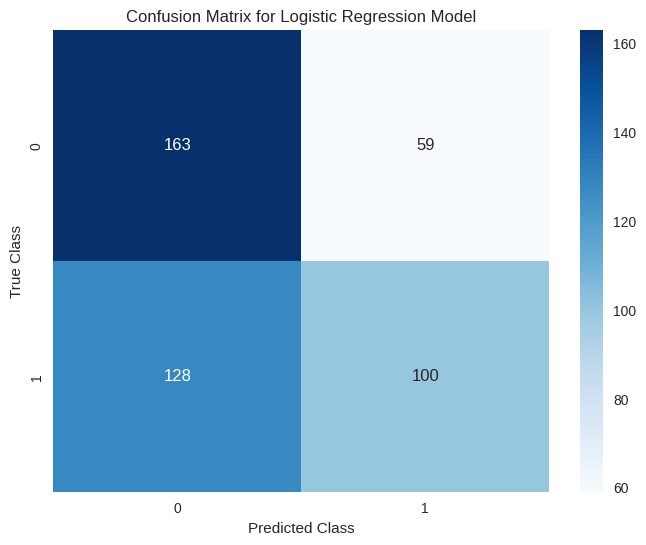

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

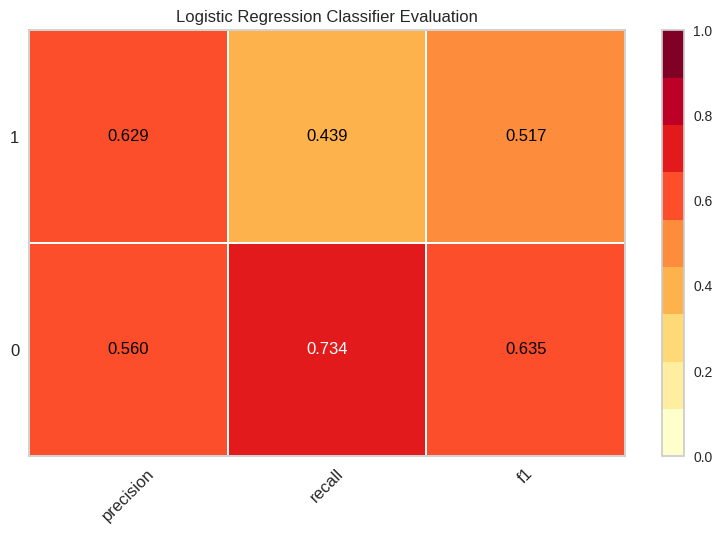

<Axes: title={'center': 'Logistic Regression Classifier Evaluation'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

# Create the classification report visualizer for the Logistic Regression model
visualizer = ClassificationReport(logistic_model, classes=class_names, support=False, title="Logistic Regression Classifier Evaluation")

# Fit the visualizer
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Display the plot
visualizer.show()

**This method provides a more detailed statistical summary, including p-values and other key metrics.**

In [ ]:
# Train the Logistic Regression model using statsmodels
model_sm = sm.Logit(y_train, X_train)
results = model_sm.fit(method="newton")

# Create a summary with the feature names
features = feature_names
print(results.summary2(xname=features))


###Use P-value for statistically significant
##LLR p-value is the overall significance of the logit regression model
##p-value for each feauture is the feature significance for prediction
##p-value <0.01 <0.05 <0.10 if p-value >= 0.10 no evidence of stats significant
##LL-null is the baseline reference model
##R^2 how much better the model performs

Optimization terminated successfully.
         Current function value: 0.667308
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: target           Pseudo R-squared: 0.033     
Date:               2025-05-02 12:54 AIC:              1415.3471 
No. Observations:   1050             BIC:              1450.0429 
Df Model:           6                Log-Likelihood:   -700.67   
Df Residuals:       1043             LL-Null:          -724.90   
Converged:          1.0000           LLR p-value:      9.5512e-09
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
song_name_len     -0.1371   0.0649 -2.1135 0.0346 -0.2642 -0.0100
acousticness       0.1238   0.0680  1.8208 0.0686 -0.0095  0.2571


In [ ]:
# Get the coefficients for each feature
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display the feature names and their corresponding coefficients
feature_impact = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)   # Convert odds ratios using the exponential function (e^x)
})

feature_impact = feature_impact.sort_values(by='Odds Ratio', ascending=False)
display(feature_impact)

Feature  Coefficient  Odds Ratio
3           rock       0.2797      1.3228
2       loudness       0.2383      1.2691
4         hiphop       0.1627      1.1767
1   acousticness       0.1214      1.1290
5          dance      -0.1315      0.8768
0  song_name_len      -0.1360      0.8729
6            rnb      -0.1476      0.8628

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict


model_cv = LogisticRegression()

# Perform cross-validation and get aggregated predictions
y_pred_cross = cross_val_predict(model_cv, X, y, cv=10)

# Calculate evaluation metrics
accuracy_cv = accuracy_score(y, y_pred_cross)
recall_cv = recall_score(y, y_pred_cross)
precision_cv = precision_score(y, y_pred_cross)
f1_cv = f1_score(y, y_pred_cross)
matrix_cv = confusion_matrix(y, y_pred_cross)

# Create a DataFrame for evaluation metrics with cross-validation
evaluation_metrics_cv = pd.DataFrame({
    "Evaluation Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [accuracy_cv, recall_cv, precision_cv, f1_cv]
})

print("Performance Metrics With Cross-Validation:")
display(evaluation_metrics_cv)


print("\nConfusion Matrix - Cross Validation:\n", matrix_cv)



# Display the evaluation metrics without CV
print("\nLogistic Regression Evaluation Metrics without CV:")
display(evaluation_metrics)
print("\nConfusion Matrix - Without CV:\n", conf_matrix)

Performance Metrics With Cross-Validation:


Evaluation Metric   Value
0          Accuracy  0.5980
1            Recall  0.4958
2         Precision  0.5930
3          F1 Score  0.5400


Confusion Matrix - Cross Validation:
 [[543 243]
 [360 354]]

Logistic Regression Evaluation Metrics without CV:


Evaluation Metric   Value
0    Train Accuracy  0.5810
1     Test Accuracy  0.5844
2            Recall  0.4386
3         Precision  0.6289
4          F1 Score  0.5168


Confusion Matrix - Without CV:
 [[163  59]
 [128 100]]


# K means Clustering

In [ ]:
## Install required packages (only needed for Colab)
!pip install pywaffle matplotlib yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 49.9 MB/s eta 0:00:00


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from pywaffle import Waffle

In [ ]:
# Step 3: Select features for clustering
# EXACT mimic of professor style
df_sub = df[['target','danceability', 'energy', 'pop','hiphop','folk', 'rnb', 'latin']]

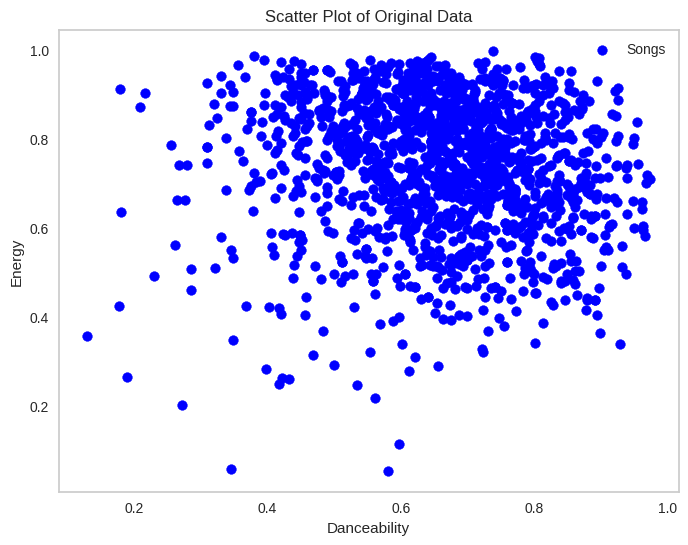

In [ ]:
# Step 4: Visualize original feature scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_sub['danceability'], df_sub['energy'], c='blue', label='Songs')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Step 5: Normalize using MinMaxScaler
norm_scaler = MinMaxScaler()
data_norm = norm_scaler.fit_transform(df_sub)

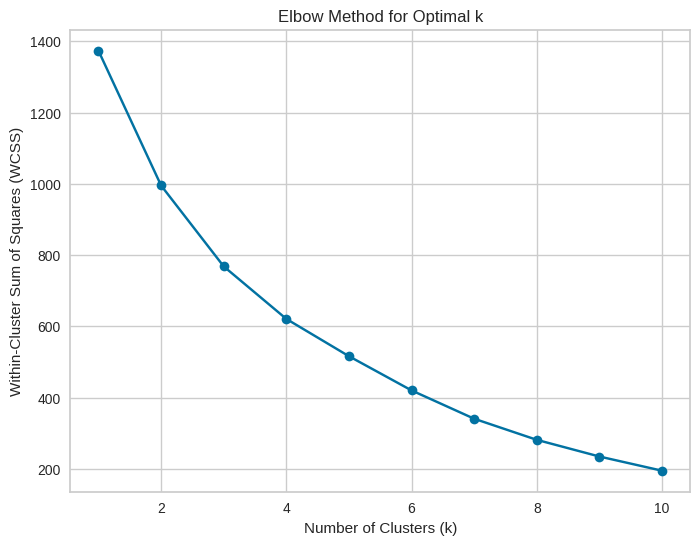

In [ ]:
# Step 6: Elbow Method (WCSS)
wcss = []
for i in range(1, 11):
    kmeans_WCSS = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1)
    kmeans_WCSS.fit(data_norm)
    wcss.append(kmeans_WCSS.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

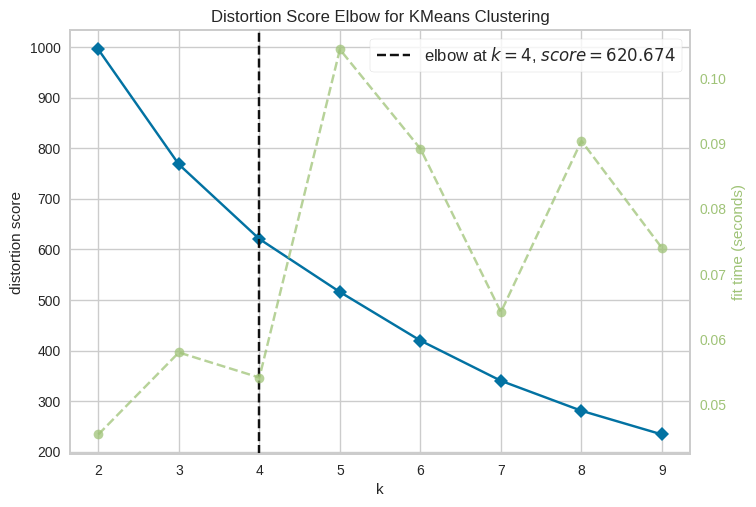

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Step 7: Yellowbrick Elbow Plot
model_Elbow = KMeans(init='k-means++', n_init=10, random_state=1)
visualizer = KElbowVisualizer(model_Elbow, k=(2, 10))
visualizer.fit(data_norm)
visualizer.show()

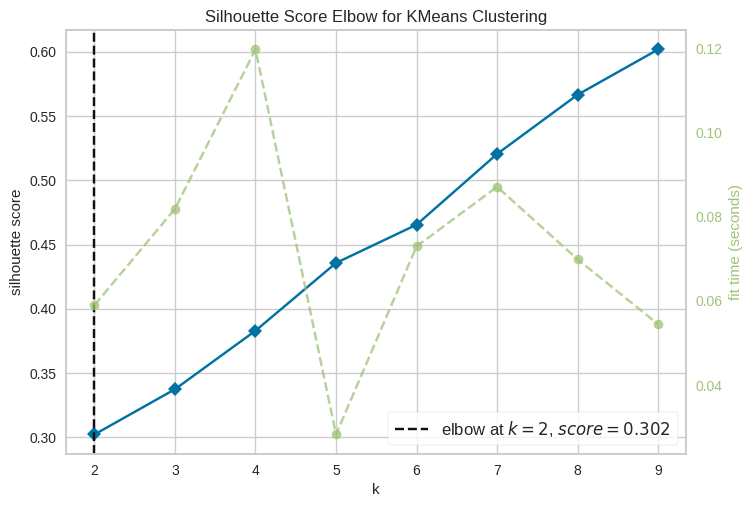

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Step 8: Yellowbrick Silhouette Plot
model_sil = KMeans(init='k-means++', n_init=10, random_state=1)
visualizer = KElbowVisualizer(model_sil, k=(2, 10), metric='silhouette')
visualizer.fit(data_norm)
visualizer.show()

In [ ]:
# Step 9: Final KMeans clustering with optimal_k = 4
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=1)
df_sub['cluster'] = kmeans_optimal.fit_predict(data_norm)

<ipython-input-88-897296ae0963>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['cluster'] = kmeans_optimal.fit_predict(data_norm)



Silhouette Score for k=4: 0.383



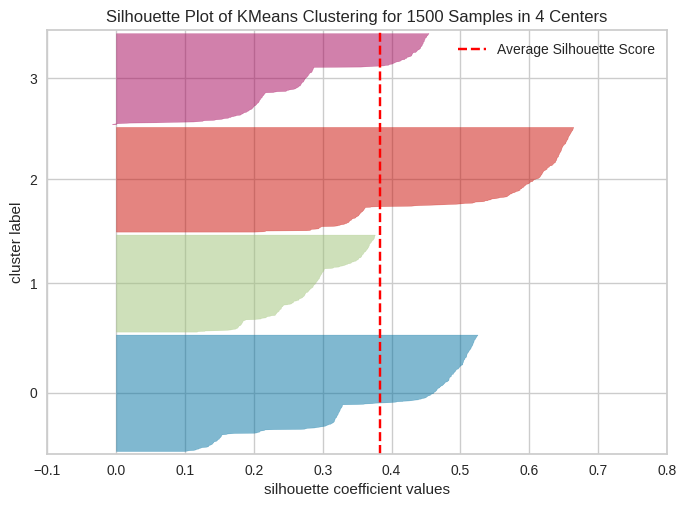

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1500 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Step 10: Silhouette Score & Visualizer
silhouette_avg = silhouette_score(data_norm, df_sub['cluster'])
print(f"\nSilhouette Score for k={optimal_k}: {silhouette_avg:.3f}\n")

visualizer = SilhouetteVisualizer(kmeans_optimal, colors='yellowbrick')
visualizer.fit(data_norm)
visualizer.show()

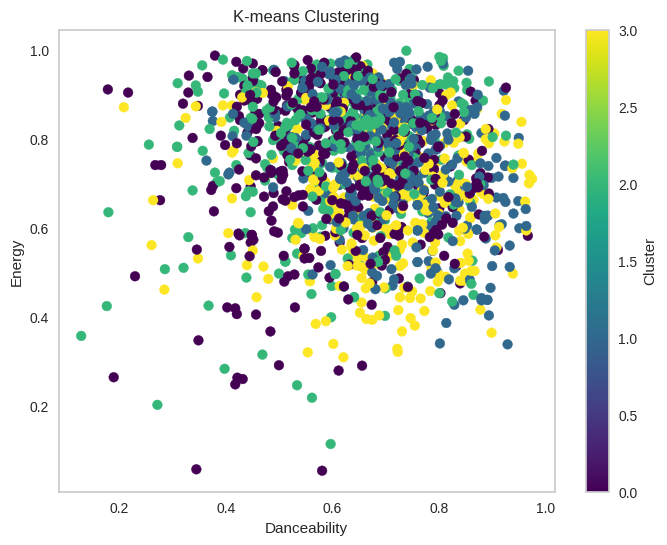

In [ ]:
# Step 11: Final cluster plot
plt.figure(figsize=(8, 6))
plt.scatter(df_sub['danceability'], df_sub['energy'], c=df_sub['cluster'], cmap='viridis', label='Song')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.grid(False)
plt.show()

In [ ]:
# Step 12: Cluster count table
cluster_counts = df_sub['cluster'].value_counts()
total = cluster_counts.sum()
cluster_summary = pd.DataFrame({
    'Count': cluster_counts,
    'Percentage': round((cluster_counts / total) * 100, 2)
})
display(cluster_summary)

Count  Percentage
cluster                   
0          427       28.47
2          384       25.60
1          356       23.73
3          333       22.20

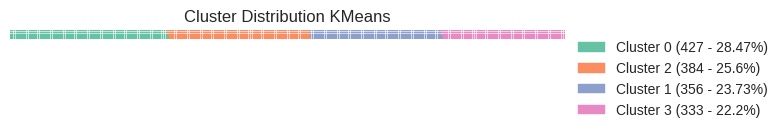

In [ ]:
# Step 13: Waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=cluster_counts,
    title={'label': 'Cluster Distribution KMeans', 'loc': 'center'},
    labels=[f"Cluster {i} ({count} - {round((count / total) * 100, 2)}%)" for i, count in cluster_counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1.2)},
    figsize=(8, 5)
)
plt.show()

In [ ]:
# Step 14: Cluster profile function

def generate_cluster_profile(data_norm, k, df_original):
    kmeans_optimal = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=1)
    df_sub = df_original.copy()
    df_sub['cluster'] = kmeans_optimal.fit_predict(data_norm)

    df_calculate = df_sub.copy()
    df_calculate['cluster_result'] = 'Cluster ' + df_calculate['cluster'].astype(str)
    df_mean_calculation = df_calculate.drop(columns=['cluster'])
    df_mean_feature = df_mean_calculation.drop(columns=['cluster_result'])

    overall_means = df_mean_feature.mean().to_frame().T
    overall_means.index = ['Overall']

    df_cluster_summary = df_mean_calculation.groupby('cluster_result').mean()
    df_profile = pd.concat([df_cluster_summary, overall_means], axis=0)

    cluster_counts = df_calculate['cluster_result'].value_counts()
    cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

    df_count_percentage = pd.DataFrame({
        'Count': cluster_counts,
        'Percentage': cluster_percentages
    })
    df_count_percentage.loc['Overall'] = [len(df_calculate), 100.0]
    df_profile = pd.concat([df_profile, df_count_percentage], axis=1)

    df_overall = df_profile.loc['Overall']
    df_profile = df_profile.drop(index='Overall')
    df_profile = df_profile.sort_values(by='Count', ascending=False)
    df_profile = pd.concat([df_profile, df_overall.to_frame().T])

    df_profile = df_profile.style.format({
        "Count": "{:.0f}",
        **{col: "{:.2f}" for col in df_profile.columns if col != "Count"}
    }).background_gradient(cmap='Purples')

    return df_profile

In [ ]:
# Step 15: Generate profile for k=4
profile_k5 = generate_cluster_profile(data_norm, 4, df_sub)
display(profile_k5)

In [ ]:
from sklearn.metrics import accuracy_score

# Match clusters to target by majority vote
# Assign the 'cluster' column from df_sub to df
df['cluster'] = df_sub['cluster']  # Add this line to bring 'cluster' column to df
cluster_to_target = df.groupby('cluster')['target'].agg(lambda x: x.value_counts().index[0]).to_dict()
df['cluster_mapped'] = df['cluster'].map(cluster_to_target)

# Calculate accuracy
accuracy = accuracy_score(df['target'], df['cluster_mapped'])
print(f"K-Means Accuracy (based on majority label per cluster): {accuracy * 100:.2f}%")

K-Means Accuracy (based on majority label per cluster): 82.60%


In [ ]:
df_clustered = df_sub.copy()
cluster_means = df_clustered.groupby('cluster').mean()
display(cluster_means)

target  danceability  energy     pop  hiphop    folk     rnb   latin
cluster                                                                      
0        1.0000        0.6123  0.7500  0.7728  0.0000  0.0187  0.1499  0.0187
1        0.5365        0.7133  0.7464  0.7640  1.0000  0.0000  0.0000  0.0365
2        0.0000        0.6265  0.7728  0.8047  0.0000  0.0182  0.0000  0.0365
3        0.2883        0.7001  0.6691  0.9730  0.6667  0.0030  1.0000  0.0090

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for c in range(4):
    cluster_data = df[df_sub['cluster'] == c]
    X = cluster_data[['valence']]
    y = cluster_data['target']

    # Check if both classes (0 and 1) exist
    if len(y.unique()) < 2:
        print(f"Cluster {c} skipped (only one class present: {y.unique()[0]})")
        continue

    model = LogisticRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    coef = model.coef_[0][0]

    print(f"Cluster {c} — Accuracy: {acc:.2f}, Valence Coef: {coef:.2f}")

Cluster 0 skipped (only one class present: 1)
Cluster 1 — Accuracy: 0.54, Valence Coef: 0.48
Cluster 2 skipped (only one class present: 0)
Cluster 3 — Accuracy: 0.71, Valence Coef: -0.31


In [ ]:
popular_means = df[df['target'] == 1].mean()
nonpopular_means = df[df['target'] == 0].mean()
difference = popular_means - nonpopular_means
display(difference.sort_values(ascending=False))

duration_ms         496.1397
popularity           24.2730
tempo                 3.9313
year                  1.1245
target                1.0000
cluster_mapped        0.6556
loudness              0.4431
hot                   0.2689
rock                  0.0811
hiphop                0.0317
energy                0.0116
liveness              0.0017
folk                  0.0010
latin                -0.0002
acousticness         -0.0003
explicit             -0.0006
valence              -0.0046
instrumentalness     -0.0056
speechiness          -0.0072
danceability         -0.0134
mode                 -0.0248
key                  -0.0397
pop                  -0.0611
dance                -0.0743
rnb                  -0.0774
song_name_len        -1.2472
cluster              -1.4207
dtype: float64

## Logistic Regression for measuring the effect of Valence

In [ ]:
##install the pywaffle package for visualization
!pip install pywaffle matplotlib

In [ ]:
# For Google Colab integration
import os
from google.colab import drive
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score


from google.colab import drive
drive.mount('/content/drive')

# For data manipulation
import pandas as pd
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from pywaffle import Waffle

In [ ]:
# import data as dataframe
file_path = '/content/drive/MyDrive/INFO648/Data/cleaned_songs_utf_final.csv'
df = pd.read_csv(file_path)


# calling head() method
df.head()

song_name_len  duration_ms  explicit    year  popularity  hot  \
0           22.0     211160.0         0  2000.0        77.0  1.0   
1           20.0     167066.0         0  1999.0        79.0  1.0   
2            7.0     250546.0         0  1999.0        66.0  0.0   
3           12.0     224493.0         0  2000.0        78.0  1.0   
4           11.0     200560.0         0  2000.0        65.0  0.0   

   danceability  energy  key  loudness  ...  valence    tempo  pop  rock  \
0         0.751   0.834  1.0    -5.444  ...    0.894   95.053  1.0   0.0   
1         0.434   0.897  0.0    -4.918  ...    0.684  148.726  1.0   1.0   
2         0.529   0.496  7.0    -9.007  ...    0.278  136.859  1.0   0.0   
3         0.551   0.913  0.0    -4.063  ...    0.544  119.992  0.0   1.0   
4         0.614   0.928  8.0    -4.806  ...    0.879  172.656  1.0   0.0   

   hiphop  dance  folk  rnb  latin  target  
0     0.0    0.0   0.0  0.0    0.0       1  
1     0.0    0.0   0.0  0.0    0.0       1  
2     0.0    0.0   0.0  0.0    0.0       1  
3     0.0    0.0   0.0  0.0    0.0       1  
4     0.0    0.0   0.0  0.0    0.0       1  

[5 rows x 25 columns]

#Select variables of interest

In [ ]:
df_sub= df[['target','danceability', 'energy', 'pop','hiphop','folk', 'rnb', 'latin']]

# Initial Scatter Plot of Selected Variables (only for two variables)
## Note: This scatter plot is two-dimensional, as it visualizes the relationship between two variables.


#Normalize the data (or Standardize if needed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# data normalization
norm_scaler = MinMaxScaler()
data_norm = norm_scaler.fit_transform(df_sub)
##data_norm is the normalized data

In [ ]:
# Standardize the independent variables
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_std = std_scaler.fit_transform(df_sub)
##data_std is the normalized data

# Perform clustering on the selected variables


#Plot the clusters (only for two variables)

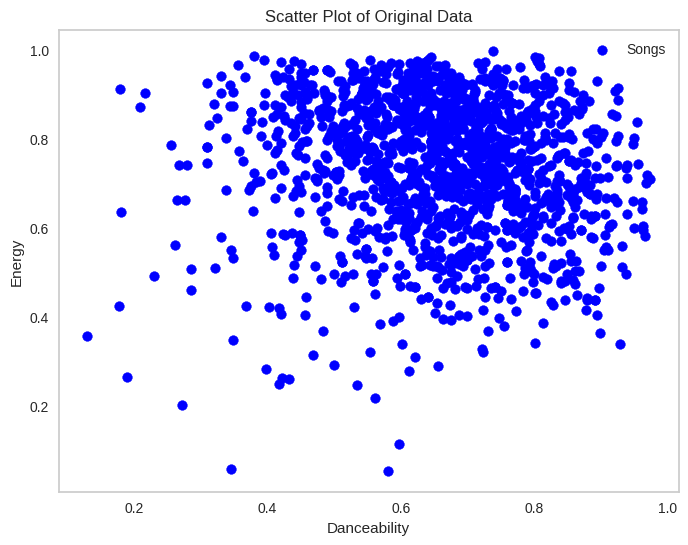

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_sub['danceability'], df_sub['energy'], c='blue', label='Songs')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.grid(False)
plt.show()

#looks for the point where the decrease in WCSS becomes insignificant relative to the previous clusters. Adding more clusters doesn’t significantly improve the fit.

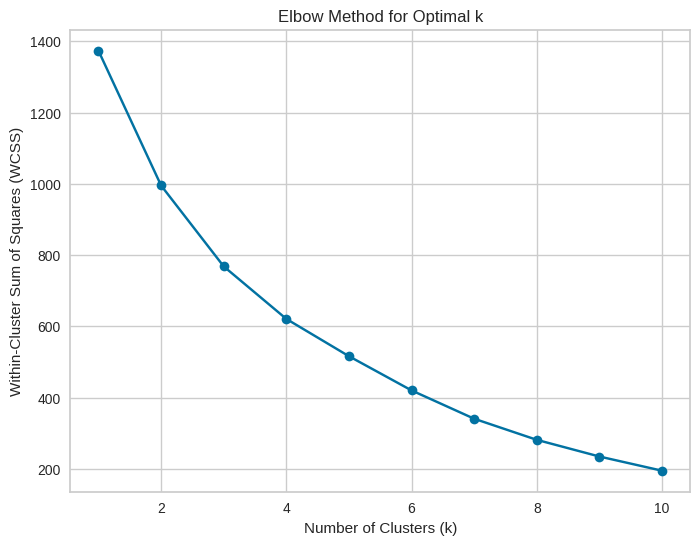

In [ ]:
# List to store WCSS (within-cluster sum of squares)
wcss = []

# Compute WCSS for a range of cluster numbers (1 to 10), you can change the number here if it is needed
for i in range(1, 11):###change here
    kmeans_WCSS = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1)
    kmeans_WCSS.fit(data_norm)
    wcss.append(kmeans_WCSS.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6)) #Adjust figure size here
plt.plot(range(1, 11), wcss, marker='o')##adjust your selection of k range here to make it shows on plot
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

#A straightforward way to help you find the best k

##Distortion score is WCSS
##WCSS focus on minimizing the variance within clusters (intra-cluster compactness)


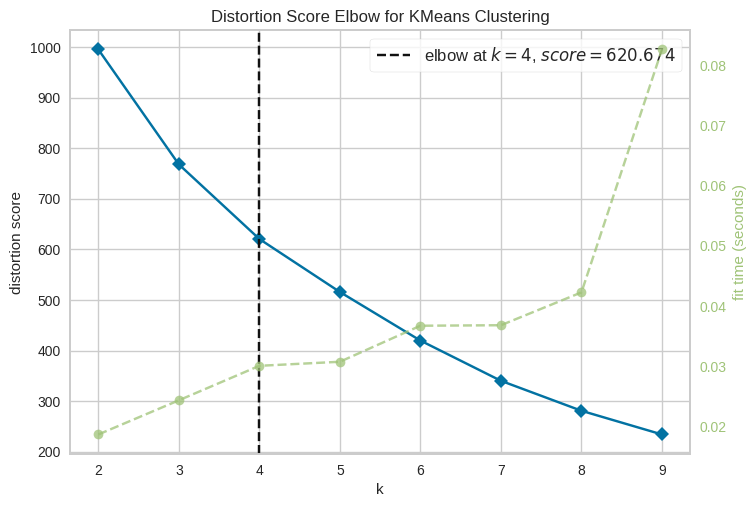

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Initialize the KMeans model with same parameters
model_Elbow = KMeans(init='k-means++', n_init=10, random_state=1)

# Initialize the visualizer with the number of clusters to explore starting from 2, k=1 does not provide meaningful infor
visualizer = KElbowVisualizer(model_Elbow, k=(2, 10)) #You can adjust the k value here


visualizer.fit(data_norm)

# Display the elbow plot
visualizer.show()

##distortion score is WCSS


#Use Silouette score (can give you different optimal K)
##Silouett score look at both compactness(cohesion) and how well-seperate (separation) from each other. If clusters are close to each other, it might suggest few clusters



##WCSS focus on minimizing the variance within clusters (intra-cluster compactness). It might suggests more clusters

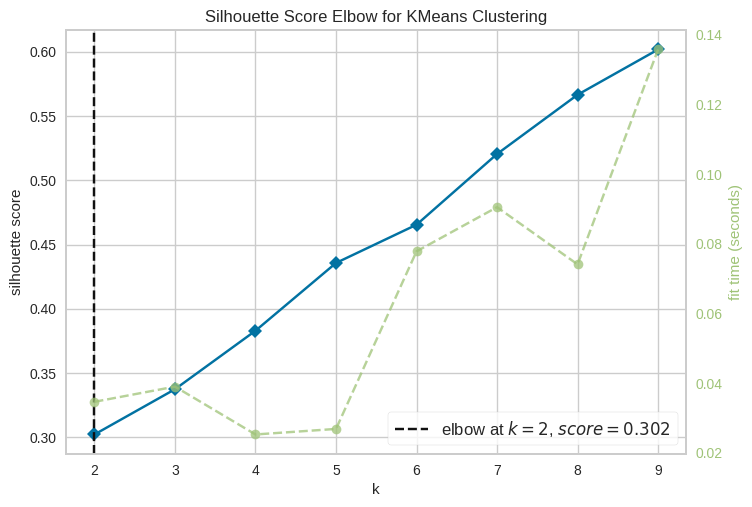

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Initialize the KMeans model with the same parameters
model_sil = KMeans(init='k-means++', n_init=10, random_state=1)


# Set the metric to 'silhouette' instead of the default 'distortion' (WCSS)
# Initialize the visualizer with the number of clusters to explore (start from 2)
visualizer = KElbowVisualizer(model_sil, k=(2, 10), metric='silhouette') ##you can change the value of k here


visualizer.fit(data_norm)

# Display the elbow plot with silhouette score
visualizer.show()


#Now we refine our model

In [ ]:
optimal_k = 4  # Replace with the number of clusters determined from the Elbow Method
kmeans_optimal= KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=1)

df_sub['cluster'] = kmeans_optimal.fit_predict(data_norm)


<ipython-input-110-caa1c329d516>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['cluster'] = kmeans_optimal.fit_predict(data_norm)



Silhouette Score for k=4: 0.3829686320072165



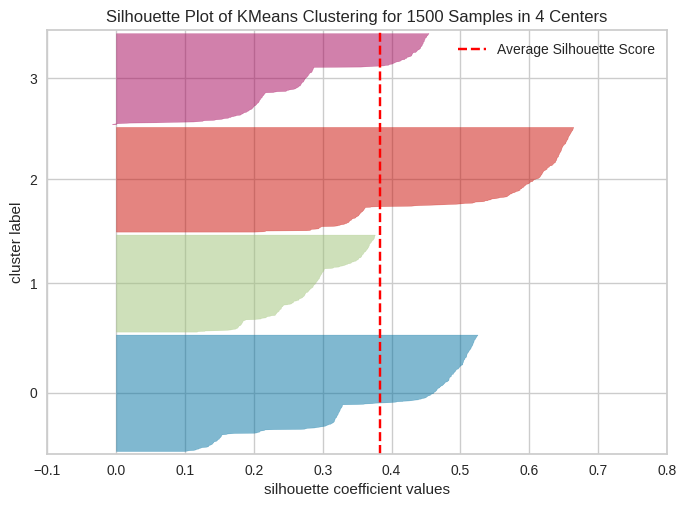

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1500 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Calculate the silhouette score for the fitted model
silhouette_avg = silhouette_score(data_norm, df_sub['cluster'])
# Print the silhouette score
print(f'\nSilhouette Score for k={optimal_k}: {silhouette_avg}\n')


visualizer = SilhouetteVisualizer(kmeans_optimal, colors='yellowbrick')
visualizer.fit(data_norm)
visualizer.show()

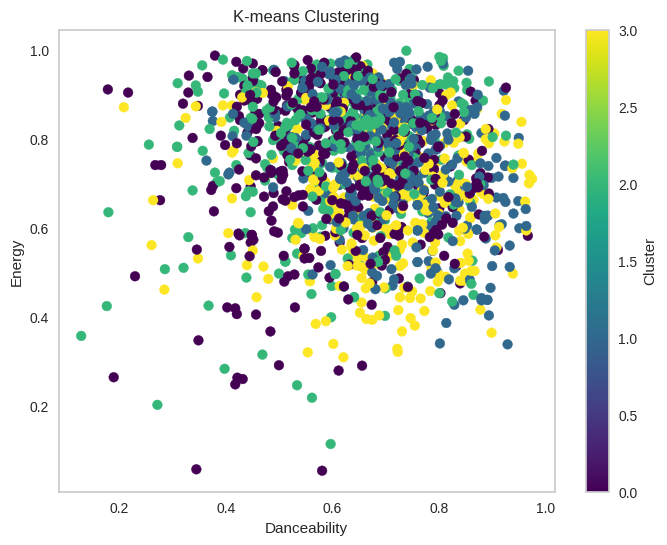

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_sub['danceability'], df_sub['energy'], c=df_sub['cluster'], cmap='viridis', label='Song')

# Adding labels and title
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')

plt.grid(False)
plt.show()

#Visualize the cluster

In [ ]:
df_sub

target  danceability  energy  pop  hiphop  folk  rnb  latin  cluster
0          1         0.751   0.834  1.0     0.0   0.0  0.0    0.0        0
1          1         0.434   0.897  1.0     0.0   0.0  0.0    0.0        0
2          1         0.529   0.496  1.0     0.0   0.0  0.0    0.0        0
3          1         0.551   0.913  0.0     0.0   0.0  0.0    0.0        0
4          1         0.614   0.928  1.0     0.0   0.0  0.0    0.0        0
...      ...           ...     ...  ...     ...   ...  ...    ...      ...
1495       0         0.787   0.848  1.0     0.0   0.0  0.0    0.0        2
1496       0         0.688   0.841  1.0     0.0   0.0  0.0    0.0        2
1497       0         0.627   0.703  1.0     1.0   0.0  0.0    0.0        1
1498       0         0.716   0.670  1.0     1.0   0.0  0.0    0.0        1
1499       0         0.685   0.709  1.0     0.0   0.0  0.0    0.0        2

[1500 rows x 9 columns]

In [ ]:
cluster_counts = df_sub['cluster'].value_counts()  # Get the counts for each cluster
total = cluster_counts.sum()  # Get the total number of data points

# Create a DataFrame to hold both counts and percentages
cluster_summary = pd.DataFrame({
    'Count': cluster_counts,
    'Percentage': round((cluster_counts / total) * 100, 2)  # Calculate percentage and round to 2 decimal places
})

# Display the table
display(cluster_summary)

Count  Percentage
cluster                   
0          427       28.47
2          384       25.60
1          356       23.73
3          333       22.20

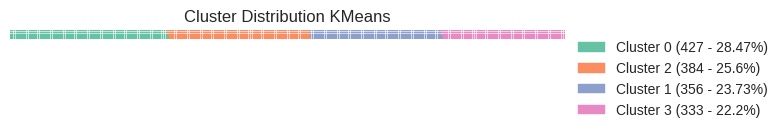

In [ ]:
from pywaffle import Waffle


cluster_counts = df_sub['cluster'].value_counts()
total = sum(cluster_counts)

# Plot the waffle chart with percentages added to the labels
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  # Number of rows in the waffle chart, you can adjust here
    values=cluster_counts,  # Values for each cluster
    title={'label': 'Cluster Distribution KMeans', 'loc': 'center'},
    labels=[f"Cluster {i} ({count} - {round((count / total) * 100, 2)}%)" for i, count in cluster_counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1.2)}, #You can also adjust the number to adjust the legend location
    figsize=(8, 5) #adjust figure size
)

plt.show()


#We need to understand the detailed stats inside each cluster


In [ ]:
####You do not need to change anything here just run it to enable the generate_cluster_profile function#########
def generate_cluster_profile(data_norm, k, df_original):

    # Apply KMeans clustering
    kmeans_optimal = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=1)
    df_sub = df_original.copy()
    df_sub['cluster'] = kmeans_optimal.fit_predict(data_norm)

    # Create a copy of the DataFrame for calculations
    df_calculate = df_sub.copy()
    df_calculate['cluster_result'] = 'Cluster ' + (df_calculate['cluster']).astype(str)

    # Exclude the 'cluster' column for mean calculation
    df_mean_calculation = df_calculate.drop(columns=['cluster'])
    df_mean_feature = df_mean_calculation.drop(columns=['cluster_result'])  # Exclude 'cluster_result' column for overall mean

    # Calculate Overall Mean for All Features in df_mean_feature
    overall_means = df_mean_feature.mean().to_frame().T
    overall_means.index = ['Overall']

    # Summarize Mean of Each Cluster
    df_cluster_summary = df_mean_calculation.groupby('cluster_result').mean()

    # Add Overall Mean Row to Cluster Summary
    df_profile = pd.concat([df_cluster_summary, overall_means], axis=0)

    # Calculate the count of items in each cluster
    cluster_counts = df_calculate['cluster_result'].value_counts()

    # Calculate the percentage of items in each cluster
    cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

    # Create a DataFrame with counts and percentages
    df_count_percentage = pd.DataFrame({
        'Count': cluster_counts,
        'Percentage': cluster_percentages
    })

    # Add a row for "Overall"
    df_count_percentage.loc['Overall'] = [len(df_calculate), 100.0]
    df_profile = pd.concat([df_profile, df_count_percentage], axis=1)
    df_overall = df_profile.loc['Overall']
    df_profile = df_profile.drop(index='Overall')

    # Sort the clusters by the Count column
    df_profile = df_profile.sort_values(by='Count', ascending=False)

    # Append the "Overall" row back to the sorted DataFrame
    df_profile = pd.concat([df_profile, df_overall.to_frame().T])

    # Format the profile DataFrame
    df_profile = df_profile.style.format({
        "Count": "{:.0f}",
        **{col: "{:.2f}" for col in df_profile.columns if col != "Count"}  # Two decimal places for all other columns
    }).background_gradient(cmap='Purples')

    return df_profile



#To generate the cluster profile call the function

In [ ]:
### change the number for k right now k is 4
##data_norm is our normalized data we call it data_norm
##df_sub is our select variables of interest

df_profile_k4 = generate_cluster_profile(data_norm, 4, df_sub) ##change the number here for k value
display(df_profile_k4)

Accuracy Measures

In [ ]:
from sklearn.metrics import accuracy_score

# Match clusters to target by majority vote
# Assign the 'cluster' column from df_sub to df
df['cluster'] = df_sub['cluster']  # Add this line to bring 'cluster' column to df
cluster_to_target = df.groupby('cluster')['target'].agg(lambda x: x.value_counts().index[0]).to_dict()
df['cluster_mapped'] = df['cluster'].map(cluster_to_target)

# Calculate accuracy
accuracy = accuracy_score(df['target'], df['cluster_mapped'])
print(f"K-Means Accuracy (based on majority label per cluster): {accuracy * 100:.2f}%")

K-Means Accuracy (based on majority label per cluster): 82.60%


## Prepare and Partition the Clusters

In [ ]:
# For model training and evaluation
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
%matplotlib inline

In [ ]:
df['cluster'] = df_sub['cluster']

In [ ]:
# Partitioning the dataframe into separate clusters
cluster_0_df = df[df['cluster'] == 0]
cluster_1_df = df[df['cluster'] == 1]
cluster_2_df = df[df['cluster'] == 2]
cluster_3_df = df[df['cluster'] == 3]


In [ ]:
display(df.isna().sum()) ##check missing value
df = df.dropna() ##drop missing value

song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
target              0
cluster             0
cluster_mapped      0
dtype: int64

In [ ]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object" and col not in "Customer Status"] ##exclude our target variable: customer status
numeric_variables

['song_name_len',
 'duration_ms',
 'explicit',
 'year',
 'popularity',
 'hot',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'pop',
 'rock',
 'hiphop',
 'dance',
 'folk',
 'rnb',
 'latin',
 'target',
 'cluster',
 'cluster_mapped']

## Select our features and our target variable

In [ ]:
# Select features for logistic regression
regression_features = ['valence', 'danceability', 'energy', 'pop','hiphop','folk', 'rnb', 'latin','target']

In [ ]:
# Logistic Regression by Cluster

# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Create separate datasets for each cluster
cluster0 = df[df['cluster'] == 0]
cluster1 = df[df['cluster'] == 1]
cluster2 = df[df['cluster'] == 2]
cluster3 = df[df['cluster'] == 3]


# Cluster 0
print("Cluster 0: All songs are popular (target=1). Logistic regression cannot be performed.")

# Cluster 1
X1 = cluster1[['valence', 'tempo', 'speechiness', 'acousticness', 'loudness']]
y1 = cluster1['target']

scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

model1 = LogisticRegression(max_iter=1000)
model1.fit(X1_scaled, y1)

coef1 = pd.DataFrame({'Feature': X1.columns, 'Coefficient': model1.coef_[0]})
display(coef1)
print(f"Valence Coefficient for Cluster 1: {coef1[coef1['Feature']=='valence']['Coefficient'].values[0]:.4f}")

# Cluster 2
print("Cluster 2: All songs are not popular (target=0). Logistic regression cannot be performed.")

# Cluster 3
X3 = cluster3[['valence', 'tempo', 'speechiness', 'acousticness', 'loudness']]
y3 = cluster3['target']

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

model3 = LogisticRegression(max_iter=1000)
model3.fit(X3_scaled, y3)

coef3 = pd.DataFrame({'Feature': X3.columns, 'Coefficient': model3.coef_[0]})
display(coef3)
print(f"Valence Coefficient for Cluster 3: {coef3[coef3['Feature']=='valence']['Coefficient'].values[0]:.4f}")

# Summary Table: % Popular and % Not Popular by Cluster

# Create a popularity summary
popularity_summary = df.groupby('cluster')['target'].agg(['count', 'sum'])
popularity_summary['% Popular'] = (popularity_summary['sum'] / popularity_summary['count']) * 100
popularity_summary['% Not Popular'] = 100 - popularity_summary['% Popular']

# Display only the relevant columns
popularity_summary_final = popularity_summary[['% Popular', '% Not Popular']]
display(popularity_summary_final)


Cluster 0: All songs are popular (target=1). Logistic regression cannot be performed.


Feature  Coefficient
0       valence       0.0922
1         tempo       0.2266
2   speechiness      -0.1182
3  acousticness       0.1474
4      loudness       0.2100

Valence Coefficient for Cluster 1: 0.0922
Cluster 2: All songs are not popular (target=0). Logistic regression cannot be performed.


Feature  Coefficient
0       valence      -0.1049
1         tempo       0.2711
2   speechiness      -0.0361
3  acousticness       0.0272
4      loudness       0.2472

Valence Coefficient for Cluster 3: -0.1049


% Popular  % Not Popular
cluster                          
0         100.0000         0.0000
1          53.6517        46.3483
2           0.0000       100.0000
3          28.8288        71.1712

In [ ]:
# Get coefficients and odds ratios
coeff = model3.coef_[0]
odds_ratios = np.exp(coeff)

coef_table = pd.DataFrame(
    'Feature': X3.columns,
    'Coefficient': coeff.round(4),
    'Odds Ratio': odds_ratios.round(4)
)

display(coef_table)

Feature  Coefficient  Odds Ratio
0       valence      -0.1049      0.9004
1         tempo       0.2711      1.3114
2   speechiness      -0.0361      0.9645
3  acousticness       0.0272      1.0276
4      loudness       0.2472      1.2804

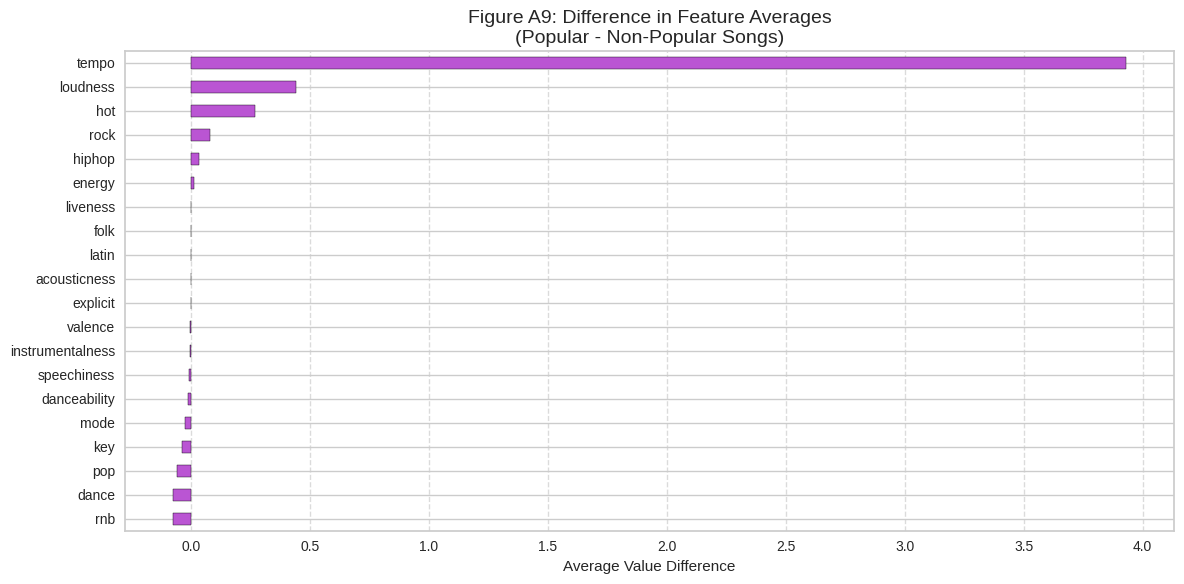

In [ ]:
# Step 1: Calculate difference
popular_means = df[df['target'] == 1].mean()
nonpopular_means = df[df['target'] == 0].mean()
difference = (popular_means - nonpopular_means)

# Step 2: Drop features with very large scales that dominate the chart
exclude_features = ['duration_ms', 'popularity', 'year', 'target', 'cluster', 'song_name_len', 'cluster_mapped']
filtered_difference = difference.drop(labels=exclude_features, errors='ignore')

# Step 3: Sort by difference value
filtered_difference = filtered_difference.sort_values(ascending=True)  # small to large for better visual

# Step 4: Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
filtered_difference.plot(kind='barh', color='mediumorchid', edgecolor='black')
plt.title("Figure A9: Difference in Feature Averages\n(Popular - Non-Popular Songs)", fontsize=14)
plt.xlabel("Average Value Difference")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()